Data Description
The dataset contains two files:

subject-info.csv contains the participant info at the time of the test. The variable ID identifies a participant, whereas the variable ID_test 
identifies an exercise test. This file contains 992 lines, one for each test. The different variables are described in the table below, with their 
corresponding amount or median [Inter Quartile Range] value.

variable

value

ID_test	992
ID	857
Age (years)	27.10 [21.10, 36.32]
Weight (kg)	73.00 [66.00, 80.23]
Height (cm)	175.00 [170.00, 180.00]
Humidity (%)	47.00 [42.00, 54.00]
Temperature (°C)	22.90 [20.80, 24.40]
Sex = 1 (Female) (%)	149 (15.0)


test_measure.csv, contains all the cardiorespiratory measurements taken during each effort test. The data is in long format, so the file contains one 
line for each breath measurement for all of the 992 effort tests, resulting in the 575087 lines present in the file. The time of each measurement is 
identified by the variable time indicating the seconds elapsed since the effort test start, the exercise test is identified by the ID_test variable,
and the variable ID indicates the participant. These effort tests contain a median [Inter Quartile Range] of 580 [484, 673] measures, for a median 
duration of 1093.00 [978.75, 1208.00] seconds. The variables in this file are:


time	Time since the measurement starts, in seconds
Speed	Speed of the treadmill, in km/h
HR	Heart rate, in beat per min
VO2	Oxygen consumption, in mL/min
VCO2	Carbon dioxide production, in mL/min
RR	Respiration rate, in respiration per minute
VE	Pulmonary ventilation, in L/min
ID	Participant identification
ID_test	Effort test identification
Note that VO2, VCO2, and VE measures are missing for 30 tests.

Usage Notes
ID_test, the variable identifying the GET, is named from the ID of the participant paired with the GET index. For example, ID_date = 245_3 is the third 
exercise test of participant ID = 245. An example of calculation in R [16] of simple heart rate recovery and cardiorespiratory index from these files
is provided in an associated GitHub repository [17].

## Importing Libraries

In [5]:
# pip install pywaffle

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


from IPython.display import display, HTML
from pywaffle import Waffle

In [11]:
subject_i = pd.read_csv("subject-info.csv")

In [13]:
test_m = pd.read_csv("test_measure.csv")

### 1. What is the average age of Female athletes who participated in this graded exercise tests?


In [16]:
female=subject_i[subject_i["Sex"]==1]
avg_age= np.mean(female['Age'])
print(avg_age)

26.044966442953022


### 2. Visualize age distribution of all athletes and display the median value in the chart.

0      10.8
1      11.8
2      12.2
3      13.2
4      13.7
       ... 
987    59.1
988    59.7
989    61.3
990    61.6
991    63.0
Name: Age, Length: 992, dtype: float64 28.979133064516127


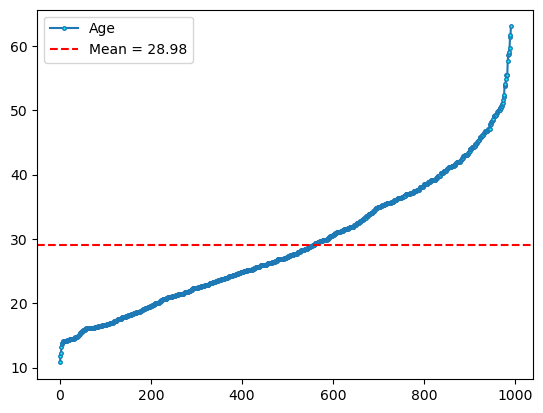

In [19]:
    
plt.plot(subject_i['Age'], label='Age',marker='o', ms=2.5, mfc='cyan')
mean_age=subject_i['Age'].mean()
print(subject_i['Age'],mean_age)

plt.axhline(mean_age, color='red', linestyle='--', label=f'Mean = {mean_age:.2f}')
plt.legend()
plt.show()

### 3.	Find the maximum time taken for all tests and then visualize the distribution of number of tests based on the test duration in minutes.Use a line chart and display the count of tests in the chart as well.


### 4. Display the consolidated list of overweight or obese people based on their BMI.

In [24]:
#BMI = Weight (kg) / [Height (cm)/100] /^2  
#BMI between 25 and 29.9 is considered overweight. 

BMI=pd.DataFrame(subject_i['ID'],columns=['ID'])
BMI['Weight']=subject_i['Weight']
BMI['Height']=subject_i['Height']
BMI['BMI']=subject_i['Weight']/((subject_i['Height']/100)**2)
#BMI['Age']=subject_i['Age']
Overweight= BMI[(BMI['BMI'] > 25) & (BMI['BMI'] < 29.9)]
print(Overweight)

#print(BMI[BMI['ID']==7])

#df_patients[(df_patients['Glucose']>140) & (df_patients['Weight']>70)]

      ID  Weight  Height        BMI
34   134    76.0   173.0  25.393431
40   588    83.0   182.0  25.057360
41    40    77.0   165.0  28.282828
48   590    88.7   178.0  27.995203
54   313    68.0   158.0  27.239224
..   ...     ...     ...        ...
982  597    78.0   175.6  25.295635
985  755    64.0   157.0  25.964542
989  390   102.0   185.0  29.802776
990  596    74.0   169.0  25.909457
991  296    83.5   171.5  28.389532

[264 rows x 4 columns]


### 5.	Create a heatmap to visualize the correlations among any three cardiorespiratory measurements, Age, and BMI.

Age        10.8       11.8      12.2      13.2  13.7  13.8  14.0  14.1  14.2  \
HR                                                                             
63.0   18.36727   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
75.0    0.00000  18.222222   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
82.0    0.00000   0.000000  17.96875   0.00000   0.0   0.0   0.0   0.0   0.0   
85.0    0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
87.0    0.00000   0.000000   0.00000  19.66759   0.0   0.0   0.0   0.0   0.0   
...         ...        ...       ...       ...   ...   ...   ...   ...   ...   
193.0   0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
194.0   0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
195.0   0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
196.0   0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
197.0   0.00000   0.000000   0.00000   0

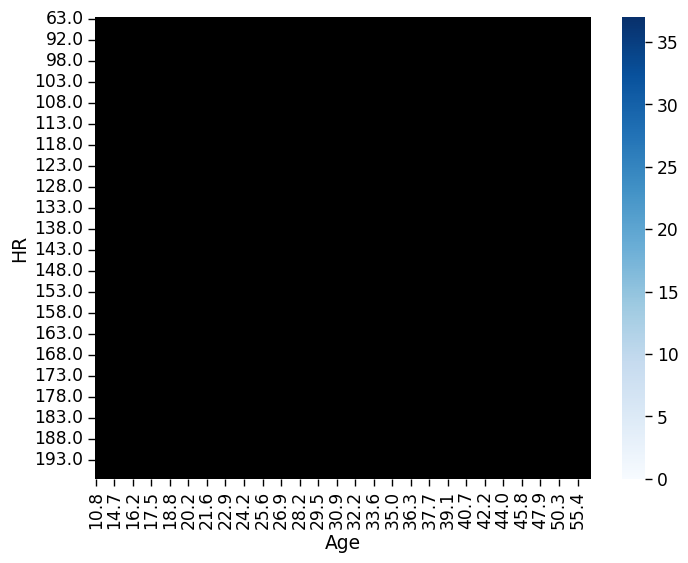

In [27]:


# Need to check
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

HR_H=pd.DataFrame(subject_i['Age'],columns=['Age'])
HR_H['BMI']=BMI['BMI']
HR_H['HR']=test_m['HR']
HR_H = HR_H.pivot_table(index='HR', columns='Age', values='BMI')
HR_H.fillna(0, inplace=True)
print(HR_H)
sns.heatmap(HR_H, cmap='Blues', linecolor='black', linewidth=0.1)
plt.show()

### 6

### 7. Get a number from the user and print its multiplication table from 1 to 10.

In [33]:

n = int(input("Enter an integer number: "))

i=1
print(f"Multiplication table for {n}")
for i in range(1,11):
  m=n*i
  print(f"{n}*{i} ={m}")
  i +=1




Enter an integer number:  6


Multiplication table for 6
6*1 =6
6*2 =12
6*3 =18
6*4 =24
6*5 =30
6*6 =36
6*7 =42
6*8 =48
6*9 =54
6*10 =60


### 11.	Plot a 3-D graph using any set of random values chosen by you

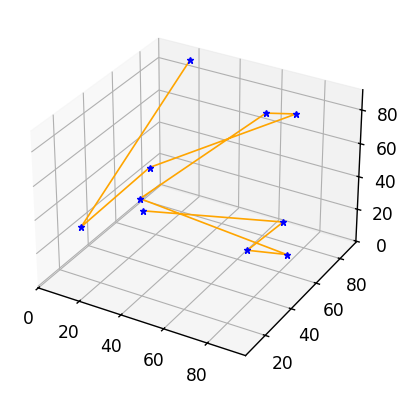

In [35]:
from mpl_toolkits.mplot3d import Axes3D

x=np.random.randint(0,100,10)
y=np.random.randint(10,100,10)
z=[1,20,50,23,45,68,78,41,39,90]
fig=plt.figure()  #This creates a new figure canvas using matplotlib.pyplot.figure().
ax = fig.add_subplot(111, projection='3d') #represents your 3D axes object.
ax.plot3D(x, y, z, 'orange', marker='*', mec='b', mfc='blue')
plt.show()

### 12.connect to database using PostgreSQL and get the details of participants in test 1 and age > 50

In [ ]:
select * from subject_info 
where 
"Age" >50
and
rtrim("ID_test") like '%_1'


### 13	Make athelete ID as index to the subject_info table and arrange index in sorted order.


In [38]:
subject_i1=subject_i
subject_i1=subject_i1.set_index('ID', inplace=True)

subject_i1=subject_i1.sort_index()

print(subject_i1)

AttributeError: 'NoneType' object has no attribute 'sort_index'

### 15	Calculate the moving average(rolling mean) of HR for participant with ID 2 in a window size of 10 and plot a graph to show both moving average and original HR.



        HR  moving_avg
0     63.0  138.894148
1     75.0  138.894148
2     82.0  138.894148
3     87.0  138.894148
4     92.0  138.894148
..     ...         ...
597  120.0  121.600000
598  120.0  121.200000
599  121.0  121.000000
600  121.0  120.900000
601  121.0  120.800000

[602 rows x 2 columns]


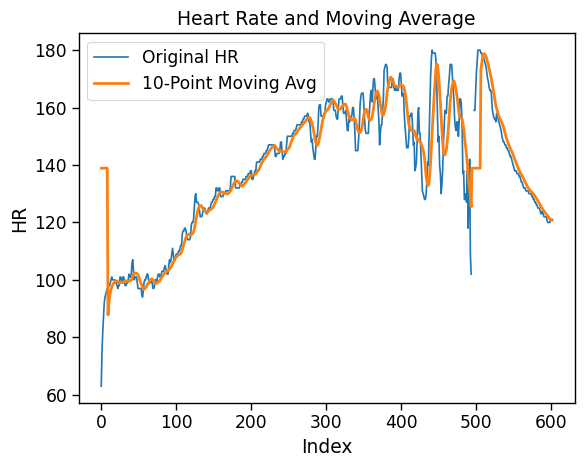

In [41]:

mov_avg=pd.DataFrame(test_m[test_m['ID']==2], columns=['HR'])
mov_avg['moving_avg'] = mov_avg['HR'].rolling(window=10).mean()

mov_avg['moving_avg'].fillna(mov_avg['moving_avg'].mean(), inplace=True)
print(mov_avg)

plt.plot(mov_avg['HR'], label='Original HR')
plt.plot(mov_avg['moving_avg'], label='10-Point Moving Avg', linewidth=2)
plt.title('Heart Rate and Moving Average')
plt.xlabel('Index')
plt.ylabel('HR')
plt.legend()
plt.show()


In [ ]:
a=subject_i[test_m['Age']>30]
print(a['Age'])

### 17.Display a histogram showing the distribution of athletes by their BMI values.

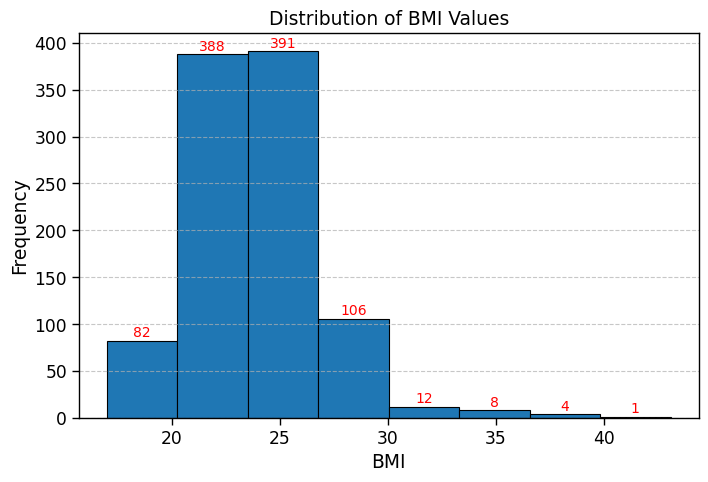

In [43]:
#Calculating the BMI values
subject_df = subject_i.copy()
subject_df['BMI'] = round(subject_df['Weight'] / ((subject_df['Height'] /100) **2),1)
#print(subject_i['BMI'])

#histogram plot for BMI distribution
plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(subject_df['BMI'], bins=8, edgecolor='black')
#print("Bin edges:", bins)
#print("Frequencies:", counts)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Label each bar with the count on top
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # X-position (center of bar)
        height + 1,                             # Y-position (slightly above bar)
        int(count),                             # Text (count value)
        ha='center', va='bottom', fontsize=10, color='RED'  # Label alignment, fontsize and its color
            )

plt.show()



### 18. " Who is the tallest participant in the dataset? What is  his/her Vo2 kg/ml?"

In [57]:
# Merge the two DataFrames on 'ID'
combined_df = pd.merge(subject_i, test_m, on='ID')

# Find the tallest person
tallest_person = combined_df[combined_df['Height'] == combined_df['Height'].max()]
print(f"ID of the Tallest Person in the Dataset is: {tallest_person['ID'].values[0]}")

# Calculate peak VO2 per kg
max_vo2 = tallest_person['VO2'].max()
vo2_kg_ml = max_vo2 / tallest_person['Weight'].iloc[0]
print("Peak VO₂ (mL/kg/min):", round(vo2_kg_ml, 2))



ID of the Tallest Person in the Dataset is: 94
Peak VO₂ (mL/kg/min): 46.86


### 19."What is the highest recorded heart rate ? Identify the patient with the highest recorded heart rate."

In [60]:
# Find the maximum heart rate value from the test data
print("Highest Heart Rate:")
print(test_m['HR'].max())

# Filter the combined DataFrame to get the row(s) with the highest heart rate
Highest_HR = combined_df[combined_df['HR'] == combined_df['HR'].max()]

# Display ID, Sex, and HR of the person(s) with the highest heart rate
print("ID, Sex, and Heart Rate of the individual(s) with the highest HR:")
print(Highest_HR[['ID', 'Sex', 'HR']])


Highest Heart Rate:
226.0
ID, Sex, and Heart Rate of the individual(s) with the highest HR:
         ID  Sex     HR
670156  619    0  226.0


### 20.What is the VO2 max(mL/kg/min) of the shortest male athlete?

In [63]:
# Filter only male athletes
male_athletes = subject_i[subject_i['Sex'] == 0]

# Find the shortest height among male athletes
shortest_height = male_athletes['Height'].min()

# Get the male athlete with that shortest height
shortest_male = male_athletes[male_athletes['Height'] == shortest_height]

# Get the ID of the shortest male
shortest_male_id = shortest_male['ID'].values[0]

# Find all test records for that ID
shortest_male_tests = test_m[test_m['ID'] == shortest_male_id]

# Find the max VO2 from their test data
max_vo2 = shortest_male_tests['VO2'].max()

# Get their weight from subject_i
weight_kg = shortest_male['Weight'].values[0]

# Calculate VO2 max in mL/kg/min
vo2_max_per_kg = max_vo2 / weight_kg

# Print result
print(f"Shortest Male Athlete ID: {shortest_male_id}")
print(f"Height: {shortest_height} cm")
print(f"Weight: {weight_kg} kg")
print(f"VO₂ max: {round(vo2_max_per_kg, 2)} mL/kg/min")



KeyError: 'ID'

### 21."Analyze the mean VO2 and VCO2 values by humidity level using a Multiseries Bar Chart.Based on your findings, how does low humidity affect respiratory and cardiovascular function during exercise (VO2 and VCO2) ? Humidity level (<30 - Low) , (30 to 60 - Normal ) ,(>60 - High)"

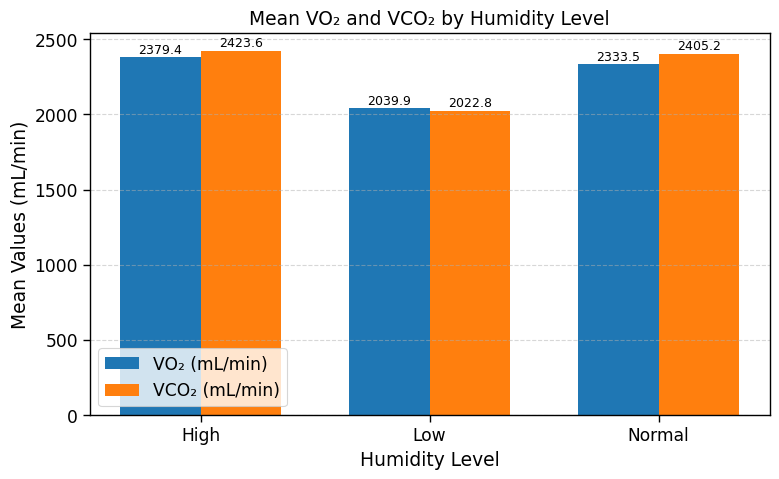

In [68]:
# Create Humidity Category
def categorize_humidity(h):
    if h < 30:
        return 'Low'
    elif h <= 60:
        return 'Normal'
    else:
        return 'High'

# Apply the categorization
combined_df['Humidity_Level'] = combined_df['Humidity'].apply(categorize_humidity)

# Group and calculate means
mean_values = combined_df.groupby('Humidity_Level')[['VO2', 'VCO2']].mean().reset_index()

# Plot multiseries bar chart
x = mean_values['Humidity_Level']
vo2 = mean_values['VO2']
vco2 = mean_values['VCO2']

bar_width = 0.35
index = range(len(x))

plt.figure(figsize=(8, 5))
vo2_bars = plt.bar(index, vo2, bar_width, label='VO₂ (mL/min)')
vco2_bars = plt.bar([i + bar_width for i in index], vco2, bar_width, label='VCO₂ (mL/min)')

# Setting lables to vo2 bars
for bar in vo2_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Setting lables to vco2 bars
for bar in vco2_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Humidity Level')
plt.ylabel('Mean Values (mL/min)')
plt.title('Mean VO₂ and VCO₂ by Humidity Level')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Analysis Summary:
##### <i>Based on mean values among different humidity level, Oxygen consumption(vo2) and Carbon Dioxide Output(vco2) values are lower in low humidity and higher in normal and high humidity level this shows that low humidity may reduce respiratory and cardiovascular stress during exercise, while high humidity increases the <br>physiological load, leading to greater oxygen utilization and metabolic output.</i> 

### 22. "Display the average speed of each participant  in ' peak exercise' based on RER (Following question no.14)"



### 23."Assign one of the following 5 heart rate zones for every Athletes  and add this as a column to a new table with all unique IDs. <br> Exclude Warm-Up Phase
Zone 1 (recovery/easy)       <100 HR max
<br> Zone 2 (aerobic/base)        100-120 HR max
<br>Zone 3 (tempo)        120-135 HR max
<br>Zone 4 (lactate threshold)        135-155 HR max
<br>Zone 5 (anaerobic)        155+ HR max and above"""

In [72]:
# excluding warm up phase, based on time(assuming warm-up is first 60 seconds)
filtered = test_m[test_m['time'] > 30]

# Get Mean HR per athlete
mean_hr_by_id = filtered.groupby('ID')['HR'].mean().reset_index()
mean_hr_by_id.rename(columns={'HR': 'Mean_HR'}, inplace=True)

# Define function to assign heart rate zone
def assign_hr_zone(hr):
    if hr < 100:
        return 'Zone 1 (Recovery/Easy)'
    elif hr < 120:
        return 'Zone 2 (Aerobic/Base)'
    elif hr < 135:
        return 'Zone 3 (Tempo)'
    elif hr < 155:
        return 'Zone 4 (Lactate Threshold)'
    else:
        return 'Zone 5 (Anaerobic)'

# Apply the zone function
mean_hr_by_id['HR_Zone'] = mean_hr_by_id['Mean_HR'].apply(assign_hr_zone)

# unique athletes with their mean HR and assigned zone
print(f"Number of Unique IDs: {test_m['ID'].nunique()}")
print(mean_hr_by_id)


Number of Unique IDs: 857
      ID     Mean_HR                     HR_Zone
0      1  133.051327              Zone 3 (Tempo)
1      2  139.535836  Zone 4 (Lactate Threshold)
2      3  169.722504          Zone 5 (Anaerobic)
3      4  153.936508  Zone 4 (Lactate Threshold)
4      5  159.785589          Zone 5 (Anaerobic)
..   ...         ...                         ...
852  853  167.138702          Zone 5 (Anaerobic)
853  854  107.978967       Zone 2 (Aerobic/Base)
854  855  133.969547              Zone 3 (Tempo)
855  856  129.504905              Zone 3 (Tempo)
856  857  168.656504          Zone 5 (Anaerobic)

[857 rows x 3 columns]


### 24. Find the athlete who has got optimal respiratory stability based on the measure of  Breathing Interval variability over time.

In [74]:
# RR field has 3.4% null values, interpolating RR values
test_m['RR'] = test_m.groupby('ID')['RR'].transform(lambda x: x.interpolate().ffill().bfill())
test_m['RR'].isna().sum()

# Breathing Interval in seconds
filtered = test_m.copy()
filtered['RR_Seconds'] = 60 / filtered['RR']

# Calculating Standard Deviation for each participant based on breathing interval(secs)
stand_dev = filtered.groupby('ID')['RR_Seconds'].std().reset_index()
filtered.rename(columns = {'RR_Seconds' : 'RR_Seconds_std'}, inplace = True)

# Finding the minimum standard deviation value of RR(sec's) to identify the steady and consistent breathing
optimal_athlete_row = filtered.loc[filtered['RR_Seconds_std'].idxmin()]
print(f"Optimal Respiratory Stability Participant id is: {optimal_athlete_row['ID']}")

Optimal Respiratory Stability Participant id is: 2


### 25. Generate a pie chart to show the gender-wise distribution of athletes.

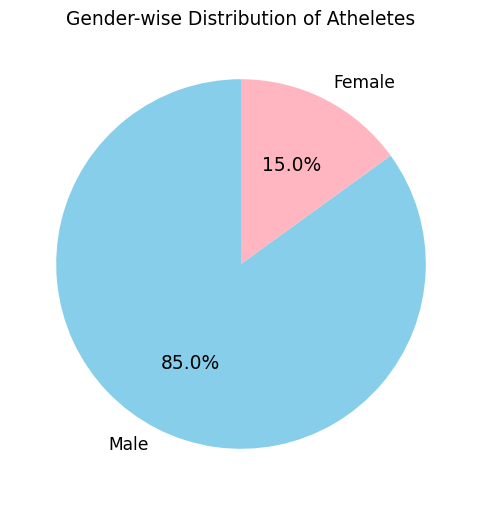

In [78]:
# Count gender distribution
gender_counts = subject_i['Sex'].value_counts()

# Assigning lables
lables = ['Male', 'Female']

# Plotting Pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, 
        labels = lables, 
        autopct ="%1.1f%%", 
        startangle = 90, 
        colors =['skyblue', 'lightpink']
       )
plt.title("Gender-wise Distribution of Atheletes")
plt.show()

### 26. Use enumeration to print ID, Sex, and BMI of each athlete.

In [80]:
# Enumerate() adds counter to any iterables, we can access both item and index
output = ""
for i, row in enumerate(subject_df.itertuples(index=False), start=1):
    output += f"{i}. ID: {row.ID} | Sex: {'Male' if row.Sex == 'Male' else 'Female'} | BMI: {row.BMI}<br>"

# Wrap the entire output in a scrollable div
display(HTML(f"""
<div style="height:300px; overflow:auto; border:1px solid #ccc; padding:10px; font-family:monospace;">
{output}
</div>
"""))


AttributeError: 'Pandas' object has no attribute 'ID'

### 27. Create a sunburst chart to show the distribution of athletes based on Sex, BMI levels, and Age ranges.

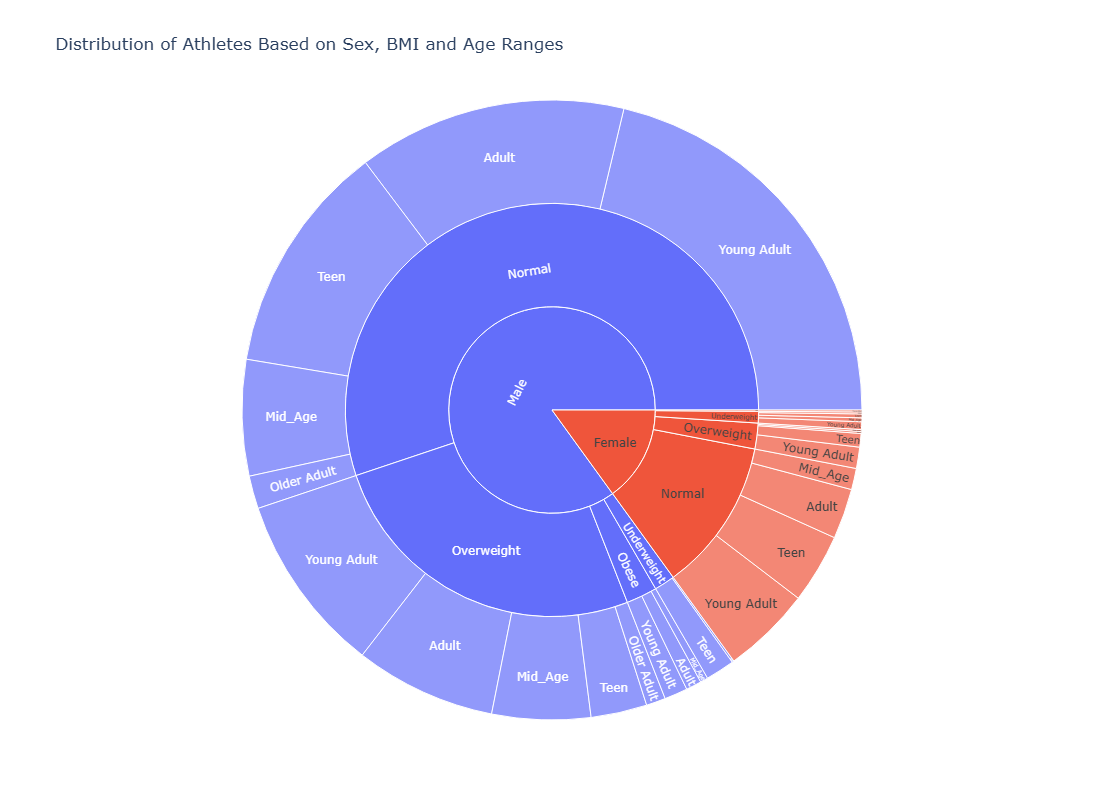

In [84]:
# Dropping null values 
subject_df1 = subject_df.copy()
subject_df1 = subject_df1.dropna(subset = ['Sex', 'BMI', 'Age'])

# Convert 0, 1 to Male, Female
subject_df1['Sex'] = subject_df1['Sex'].map({0: 'Male', 1: 'Female'})

# Categorize BMI levels
def categ_bmi(bmi):
     if bmi < 18.5:
        return 'Underweight'
     elif bmi < 25:
        return 'Normal'
     elif bmi < 30:
        return 'Overweight'
     else:
        return 'Obese'

subject_df1['BMI_level'] = subject_df1['BMI'].apply(categ_bmi)

# Categorize age range
def categ_age(age):
    if age < 20:
        return 'Teen'
    elif age < 30:
        return 'Young Adult'
    elif age < 40:
        return 'Adult'
    elif age < 50:
        return 'Mid_Age'
    else:
        return 'Older Adult'

subject_df1['Age_range'] = subject_df1['Age'].apply(categ_age)

# Plotting sunburst chart
fig = px.sunburst(subject_df1,
                  path = ['Sex', 'BMI_level', 'Age_range'],
                  values = None,
                  title = 'Distribution of Athletes Based on Sex, BMI and Age Ranges'
                )

# Increase the size of the chart
fig.update_layout( width =800,
                  height = 800
                 )
fig.show()


### 28."Create a dictionary using any 5 random Athletes ID and their height. <br>Access any one height using the Athlete ID with get() function. "

In [88]:
# Getting random 5 records
sample_df = subject_i[['ID', 'Height']].dropna().sample(5, random_state = 42)

# Converting into a Dictionary
sample_df_dict = dict(zip(sample_df['ID'], sample_df['Height']))
print("Athlete Height Dictionary--> \nID: Height")
print(sample_df_dict)

# Pick one ID from dictionary
sample_keys = list(sample_df_dict.keys())[0]

# Getting height Using get() function 
height = sample_df_dict.get(sample_keys)
print(f"Height of Athlete with ID {sample_keys} is : {height} cm")

KeyError: "['ID'] not in index"

### 29.

### 30. "Create a waffle chart to show the percentage of participant in each HR zone (followed by question 23)"

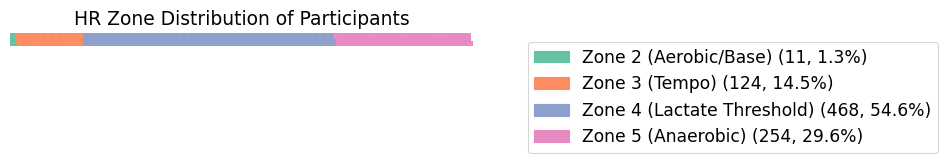

In [91]:




zone_counts = mean_hr_by_id['HR_Zone'].value_counts().sort_index()

# Create a Waffle Chart
labels = [
    f"{zone} ({count}, {count / zone_counts.sum() * 100:.1f}%)"
    for zone, count in zone_counts.items()
         ]
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,  
    values = zone_counts,
    title = {'label': 'HR Zone Distribution of Participants', 'loc': 'center'},
    labels = labels,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    figsize  =(10, 5),
)

plt.show()

### 31. Calculate the Tidal volume of every athlete and display it as a list.

In [95]:


# Exclude rows where VE or RR is missing or RR is zero
filtered = test_m[(test_m['VE'].notna()) & (test_m['RR'].notna()) & (test_m['RR'] > 0)].copy()

# Calculate Tidal Volume
filtered['Tidal_Volume_L'] = filtered['VE'] / filtered['RR']  # Result in Liters per breath

# Converting to mL 
filtered['Tidal_Volume_mL'] = filtered['Tidal_Volume_L'] * 1000

# Display as list (average tidal volume per athlete)
tidal_volume_list = round(filtered.groupby('ID')['Tidal_Volume_mL'].mean().reset_index(),1)

print("Average Tidal Volume per Athlete (in mL):")
print(tidal_volume_list)






Average Tidal Volume per Athlete (in mL):
      ID  Tidal_Volume_mL
0      1           2027.3
1      2           1373.2
2      3           1599.4
3      4           2188.8
4      5           1917.5
..   ...              ...
852  853           1730.4
853  854           2395.3
854  855           1641.0
855  856           2098.7
856  857           2060.4

[857 rows x 2 columns]


### 32.create a Pivot table to summarize the count of each HR Zone

In [98]:
print(mean_hr_by_id.nunique())
# Create a pivot table to count athletes in each HR Zone
hr_zone_pivot = pd.pivot_table(
    mean_hr_by_id,
    index='HR_Zone',         # Group by HR Zone
    values='ID',             # Count IDs
    aggfunc='count'          # Count how many athletes in each zone
)

# Rename column
hr_zone_pivot.rename(columns={'ID': 'Athlete_Count'}, inplace=True)

# Display the pivot table
print(hr_zone_pivot)



ID         857
Mean_HR    857
HR_Zone      4
dtype: int64
                            Athlete_Count
HR_Zone                                  
Zone 2 (Aerobic/Base)                  11
Zone 3 (Tempo)                        124
Zone 4 (Lactate Threshold)            468
Zone 5 (Anaerobic)                    254


### 33.Connect to database using PostgresSQL and increase the temperature 2 degree for participant with maximum humidity and display the result

### 34.Create an array, np.arrange.reshape(3,4). Replace the array elements with their square values if the element is an even Number. Keep the odd numbers as such. Displaying the resulting array.

In [103]:
# Create an array with values from 0 to 11 and reshape it to 3x4
arr = np.arange(12).reshape(3, 4)

# Replace even numbers with their squares, keep odd numbers as it is.
# Using np.where: condition is arr % 2 == 0 (even), then square it, else keep original
result = np.where(arr % 2 == 0, arr ** 2, arr)

# Display the resulting array
print("Original array:\n", arr)
print("\nModified array (even numbers squared):\n", result)


Original array:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Modified array (even numbers squared):
 [[  0   1   4   3]
 [ 16   5  36   7]
 [ 64   9 100  11]]


### 35. Read 10 records from dataframe and convert into Json format and print the data

In [111]:
# Get the first 10 records of the patient record from the subject-info
subject_10_records=subject_i.head(10) 
# convert into Json
subject_son=subject_10_records.to_json(orient='records',lines=True)
# print the data
print(subject_json)




NameError: name 'subject_json' is not defined

### 36. Create a Barchart in HR vs count and apply hatches to the bars? # recheck

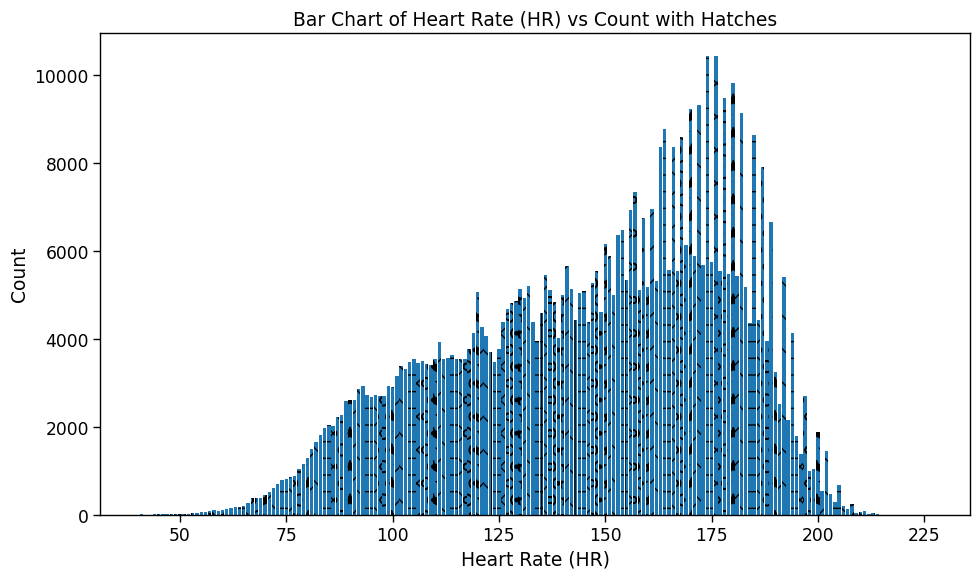

In [114]:



# Count occurrences of each HR value
HR_counts = test_m['HR'].value_counts().sort_index()

# Create bar chart with hatches
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(HR_counts.index, HR_counts.values)

# Apply hatches: cycle through a few patterns
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for i, bar in enumerate(bars):
    bar.set_hatch(hatch_patterns[i % len(hatch_patterns)])

# Labels and title
ax.set_xlabel('Heart Rate (HR)')
ax.set_ylabel('Count')
ax.set_title('Bar Chart of Heart Rate (HR) vs Count with Hatches')

plt.tight_layout()
plt.show()


### 37. Who is the youngest athlete and how many tests did she take part in?


In [117]:


#  Find the youngest athlete (the one with the minimum age)
youngest_athlete = subject_i.loc[subject_i['Age'].idxmin()]


# Get the athlete ID,Age and ID_test
youngest_athlete_id = youngest_athlete['ID']
youngest_athlete_age = youngest_athlete['Age']
youngest_athlete_test_id = youngest_athlete['ID_test']


youngest_tests = test_m[test_m['ID_test'] == youngest_athlete_test_id]

num_tests = len(youngest_tests)

# Print the result
print(f"The youngest athlete ID is  {youngest_athlete_id} and her age is {youngest_athlete_age} is and she took part in {num_tests} tests.")




KeyError: 'ID'

### 38. Plot the changes in HR and VO2 over time for each ID_Test. Add a trendline to compare the HR and VO2 changes.

### 39.

### 40.  Identify the test that took the longest time to complete

In [125]:
# Step 4: Find the test that took the longest time to complete
longest_test = test_m.loc[test_m['time'].idxmax()]

# Step 5: Output the result (test ID, and the longest time)
test_id = longest_test['ID_test']
time_taken = longest_test['time']
print(f"The test with the longest time is Test ID {test_id}, with a time of {time_taken} units.")

The test with the longest time is Test ID 699_1, with a time of 1712 units.


### 41

### 42

### 43

### 44

### 45

### 46. Find the oldest athlete in the dataset and determine the number of breaths recorded for the oldest athlete during the test.

In [144]:
# Finding  the oldest athlete.

oldest_age = subject_i['Age'].max()
oldest_athlete = subject_i[subject_i['Age'] == oldest_age]

#  Get the ID(s) of the oldest athlete
oldest_ids = oldest_athlete['ID_test'].unique()

# Count breaths (rows) in test data for this athlete
# Assuming 'ID_test' in test.csv matches 'ID_Test' in subject.csv
breath_counts = test_m[test_m['ID_test'].isin(oldest_ids)].shape[0]

# Output
print("Oldest Athlete Age:", oldest_age)
print("ID_test:", list(oldest_ids))
print("Number of breaths recorded during the test:", breath_counts)


Oldest Athlete Age: 63.0
ID_test: ['296_1']
Number of breaths recorded during the test: 345


### 47. Assuming age is given for the current year (2025), list the partcipants born on leap year?

In [148]:
# Calculate birth year assuming age given for the current year (2025)
subject_i['birth_year'] = 2025 - subject_i['Age']

 #  Function to check for leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Filtering the  participants born in a leap year
leap_year_participants = subject_i[subject_i['birth_year'].apply(is_leap_year)]

# Display the result
print(leap_year_participants[['ID', 'Age', 'birth_year']])

KeyError: "['ID'] not in index"

### 48

### 49 Identify the test name that had the shortest time duration. 

In [164]:
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Calculate duration for each test (ID_test)
duration_per_test = test_measure.groupby("ID_test")["time"].agg(["min", "max"])

print(duration_per_test)

duration_per_test["duration"] = duration_per_test["max"] - duration_per_test["min"]

# Identify the test with the shortest duration
shortest_test = duration_per_test["duration"].idxmin()
print(shortest_test)

shortest_duration = duration_per_test.loc[shortest_test, "duration"]

print(f"Test with the shortest duration is '{shortest_test}' with a duration of {shortest_duration} minutes.")


         min   max
ID_test           
100_1      0  1026
101_1      0  1024
102_1      0   870
103_1      0   861
104_1      0  1144
...      ...   ...
98_1       0  1205
99_1       0   927
99_47      0   768
99_54      0   899
9_1        0   895

[992 rows x 2 columns]
564_1
Test with the shortest duration is '564_1' with a duration of 495 minutes.


### 50 What is the percentage difference in mean Carbon dioxide production between male and female athletes?


In [167]:
merged_df = pd.merge(test_measure, subject_info, on='ID')

# Group by 'sex' and calculate the mean of 'VCO2'
mean_vco2_by_sex = merged_df.groupby('Sex')['VCO2'].mean()

# Calculate percentage difference between the means of sex 0 and 1
percentage_difference = ((mean_vco2_by_sex[1] - mean_vco2_by_sex[0]) / mean_vco2_by_sex[0]) * 100

mean_vco2_by_sex, percentage_difference


(Sex
 0    2497.198164
 1    1765.666184
 Name: VCO2, dtype: float64,
 -29.294110102267958)

### 51 Calculate the Fitness Index, generate a bar chart of Fitness Index categories, and export it as SVG file.


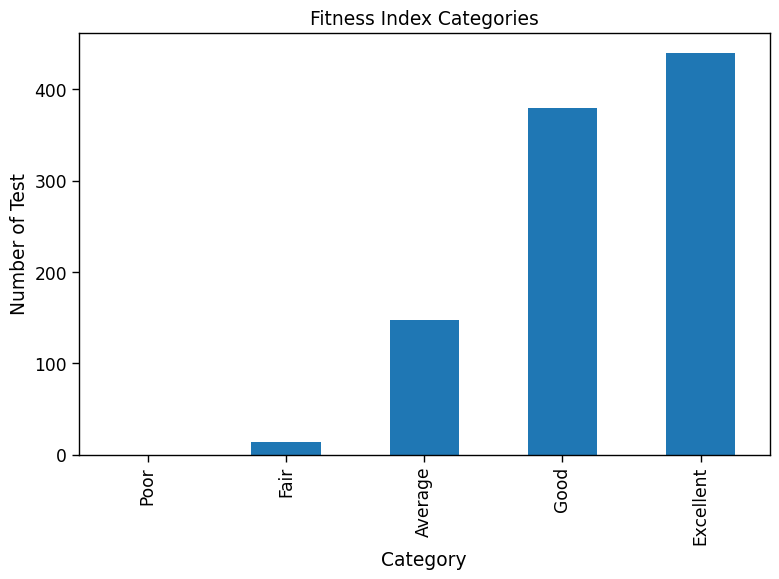

In [171]:
max_vo2 = test_measure.groupby('ID_test')['VO2'].max().reset_index()
max_vo2.rename(columns={'VO2': 'Max_VO2'}, inplace=True)

# Merge with subject info
merged_df = pd.merge(subject_info, max_vo2, on='ID_test')

# Compute Fitness Index = Max_VO2 / Weight
merged_df['Fitness_Index'] = merged_df['Max_VO2'] / merged_df['Weight']

# Categorize Fitness Index into bins
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['Poor', 'Fair', 'Average', 'Good', 'Excellent']
merged_df['Fitness_Category'] = pd.cut(merged_df['Fitness_Index'], bins=bins, labels=labels)

# Count categories for the bar chart
category_counts = merged_df['Fitness_Category'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Fitness Index Categories')
plt.xlabel('Category')
plt.ylabel('Number of Test')
plt.tight_layout()

plt.savefig("test.svg", format="svg")

plt.show()



### 52 Transpose this numpy matrix. and calculate sum of each row after transposing. 

In [174]:

#Find the row with highest sum(after transposing)

#input array
arr = np.array([[3, 5, 7, 9],
                   [2, 0, 8, 10],
                   [1, 4, 8, 12],
                   [5, 9, 14, 15]])

transposed_arr = arr.T
sum_row = np.sum(transposed_arr, axis=1)
row_max_sum = np.argmax(sum_row)

print("The given matrix:\n", arr)
print("The transposed matrix:\n", transposed_arr)
print("Sum of each row:", sum_row)
print("The row with the highest sum: (index starts with 0)", row_max_sum)

The given matrix:
 [[ 3  5  7  9]
 [ 2  0  8 10]
 [ 1  4  8 12]
 [ 5  9 14 15]]
The transposed matrix:
 [[ 3  2  1  5]
 [ 5  0  4  9]
 [ 7  8  8 14]
 [ 9 10 12 15]]
Sum of each row: [11 18 37 46]
The row with the highest sum: (index starts with 0) 3


### 53 Display participant details with highest average cardiorespiratory fitness in terms of VO2 max.

In [177]:

# Group the test_measure data by 'ID' and calculate the average VO2 per participant
avg_vo2 = test_measure.groupby('ID')['VO2'].mean().reset_index()
avg_vo2.rename(columns={'VO2': 'Average_VO2_Max'}, inplace=True)

# Find the maximum average VO2 max value
max_vo2 = avg_vo2['Average_VO2_Max'].max()

# Filter the participant(s) with the highest average VO2 max
top_participants = avg_vo2[avg_vo2['Average_VO2_Max'] == max_vo2]

# Merge with subject_info to get detailed participant information
result = pd.merge(top_participants, subject_info, on='ID')

result[['ID', 'Average_VO2_Max', 'Age', 'Weight', 'Height', 'Sex']]





ID  Average_VO2_Max   Age  Weight  Height  Sex
0  409      3994.835294  23.6    86.0   190.0    0

### 54 calculate the heart rate reserve and show the distribution as density plot 

In [181]:
# group by ID and get the aggregator for HR min and max

hr_stats_group_by = test_measure.groupby('ID').agg(Rest_HR=('HR', 'min'), Max_HR=('HR', 'max')).reset_index()

# merge HR stats with subject info dataset
merged_df = pd.merge(subject_info, hr_stats_group_by, on='ID', how='inner')

# Calculate the HRR 
merged_df['HRR'] = merged_df['Max_HR'] - merged_df['Rest_HR']

# Display the results in table format with ID, Age, Rest_HR, Max_HR and HRR values
merged_df[['ID', 'Age', 'Rest_HR', 'Max_HR', 'HRR']].head()

ID   Age  Rest_HR  Max_HR    HRR
0  543  10.8     58.0   205.0  147.0
1   11  11.8     96.0   193.0   97.0
2  829  12.2    110.0   195.0   85.0
3  284  13.2     76.0   198.0  122.0
4  341  13.7     81.0   186.0  105.0

### 55 Create a boxplot comparing heart rates between males and females, showing hue as speed category.

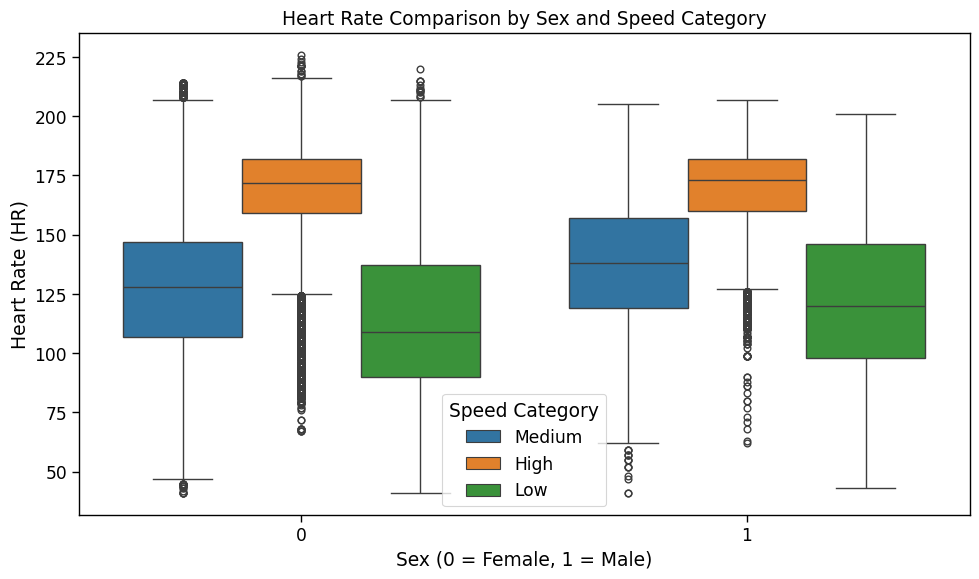

In [185]:


# Merge the two datasets on ID
merged_df = pd.merge(test_measure, subject_info[['ID', 'Sex']], on='ID')

# Create a speed category column category like low < 5, medium 5-10, high > 10
def categorize_speed(speed):
    if speed < 5:
        return 'Low'
    elif speed <= 10:
        return 'Medium'
    else:
        return 'High'

merged_df['Speed_Category'] = merged_df['Speed'].apply(categorize_speed)

# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='HR', hue='Speed_Category', data=merged_df)
plt.title('Heart Rate Comparison by Sex and Speed Category')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Heart Rate (HR)')
plt.legend(title='Speed Category')
plt.tight_layout()
plt.show()




### 56 Choose any feature that follows a Gaussian distribution, convert it into a standard normal distribution, and visualize the results?

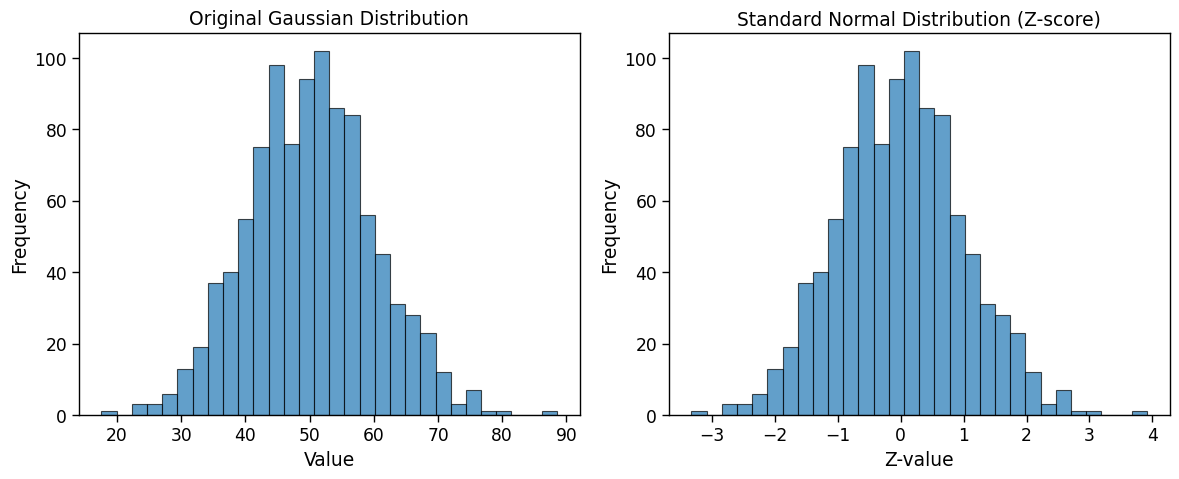

In [187]:

# Create a Gaussian-distributed feature
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)  # mean=50, std=10
df = pd.DataFrame({'original_feature': data})

# Convert it to a standard normal distribution 
df['standardized_feature'] = (df['original_feature'] - df['original_feature'].mean()) / df['original_feature'].std()

# Visualize both original and standardized features
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
plt.hist(df['original_feature'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Original Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Standardized distribution
plt.subplot(1, 2, 2)
plt.hist(df['standardized_feature'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Standard Normal Distribution (Z-score)')
plt.xlabel('Z-value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 57 Identify the participant who has taken maximum number of Graded Exercise test and justify.


In [191]:

subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

#total test count
test_counts = test_measure['ID_test'].drop_duplicates().groupby(test_measure['ID']).count()


max_tests = test_counts.max()
top_participant_ids = test_counts[test_counts == max_tests].index


top_participant_details = subject_info[subject_info['ID'].isin(top_participant_ids)]

print(top_participant_details[['ID', 'Age', 'Weight', 'Height']])
print(f"\max tests: {max_tests}")





      ID   Age  Weight  Height
928  506  46.1    72.0   173.0
937  506  46.8    69.5   173.0
945  506  47.7    68.0   173.0
948  506  48.2    70.9   177.2
953  506  49.1    71.5   173.0
\max tests: 5


### 58 For participant ID 725 show trend of  any three variables against time in a single canva ?

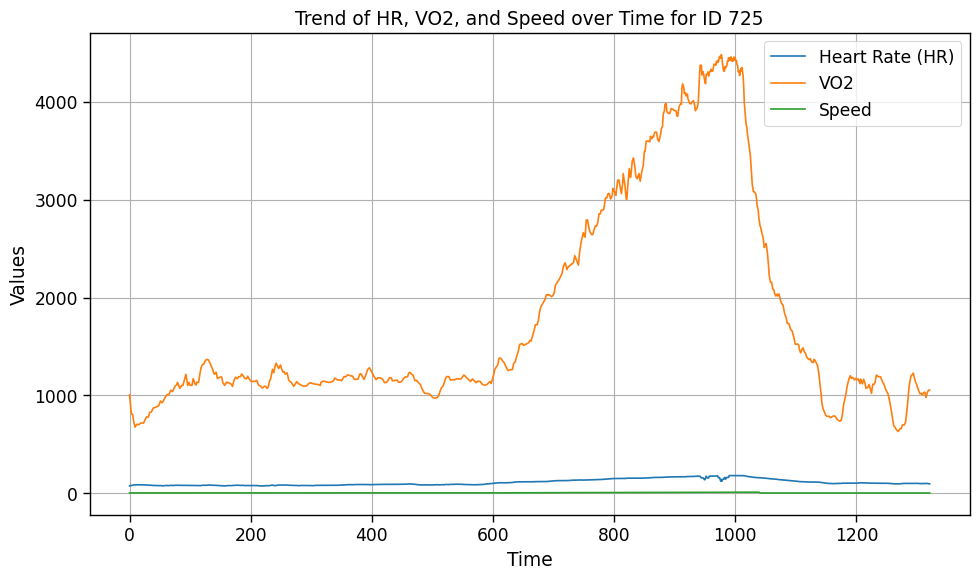

In [195]:
# Filter test_measure data for ID 725

id_725_data = test_measure[test_measure["ID"] == 725]

# Plot three variables: HR (Heart Rate), VO2, and Speed against time in single canva
plt.figure(figsize=(10, 6))
plt.plot(id_725_data["time"], id_725_data["HR"], label="Heart Rate (HR)")
plt.plot(id_725_data["time"], id_725_data["VO2"], label="VO2")
plt.plot(id_725_data["time"], id_725_data["Speed"], label="Speed")

plt.title("Trend of HR, VO2, and Speed over Time for ID 725")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 59 Create a scatter plot with a regression line using Altair, take a random sample data with features 'x' and 'y'.


### 60 Use a strip plot to illustrate the distribution of Heart Rate Reserve (HRR) values, highlighting the lowest and highest values to showcase the range of HRR.


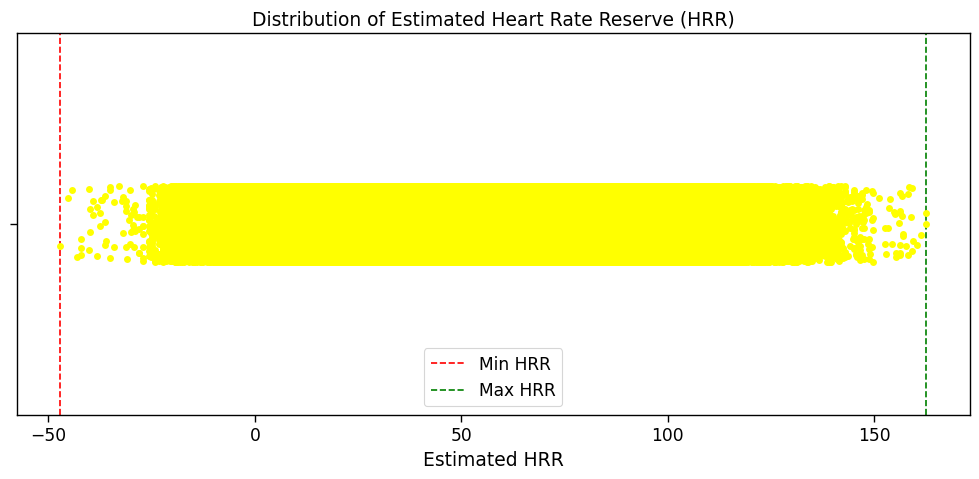

In [202]:

merged_df = pd.merge(subject_info, test_measure, on='ID', how='inner')


merged_df['Estimated_HRR'] = (220 - merged_df['Age']) - merged_df['HR']

plt.figure(figsize=(10, 5))
sns.stripplot(data=merged_df, x='Estimated_HRR', color='yellow', jitter=True)

plt.axvline(merged_df['Estimated_HRR'].min(), color='red', linestyle='--', label='Min HRR')
plt.axvline(merged_df['Estimated_HRR'].max(), color='green', linestyle='--', label='Max HRR')

plt.title("Distribution of Estimated Heart Rate Reserve (HRR)")
plt.xlabel("Estimated HRR")
plt.legend()
plt.tight_layout()
plt.show()


### 61 Create a swarm plot to visualize the relationship between humidity and temperature for each gender.


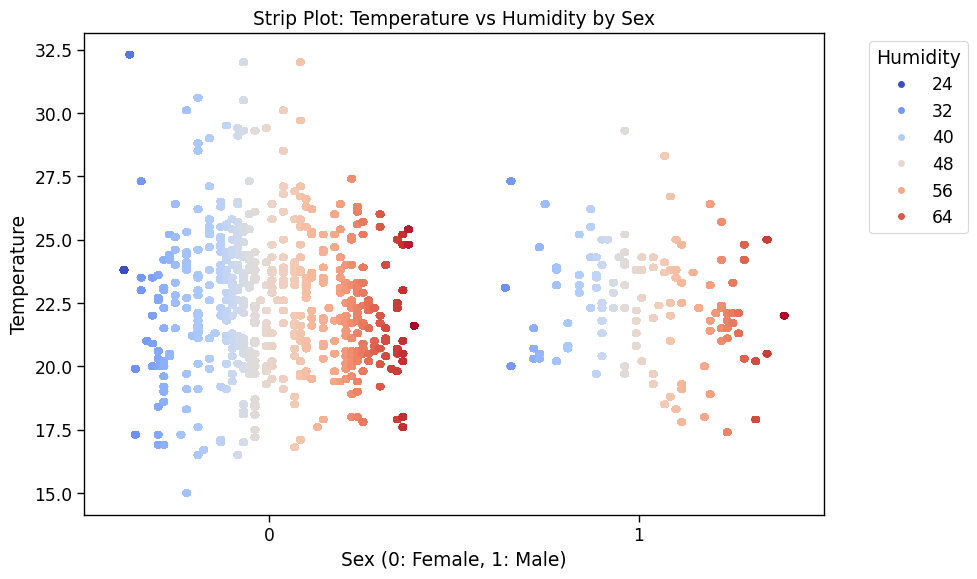

In [205]:

merged_df = pd.merge(subject_info, test_measure, on='ID', how='inner')
plt.figure(figsize=(10, 6))
sns.stripplot(data=merged_df, x='Sex', y='Temperature', hue='Humidity', palette='coolwarm', dodge=True)
plt.title('Strip Plot: Temperature vs Humidity by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Temperature')
plt.legend(title='Humidity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 62 Analyze the relationship between fitness levels and physiological attributes and identify trends in the scatter plot of VO2 max (ml/kg/min) versus age


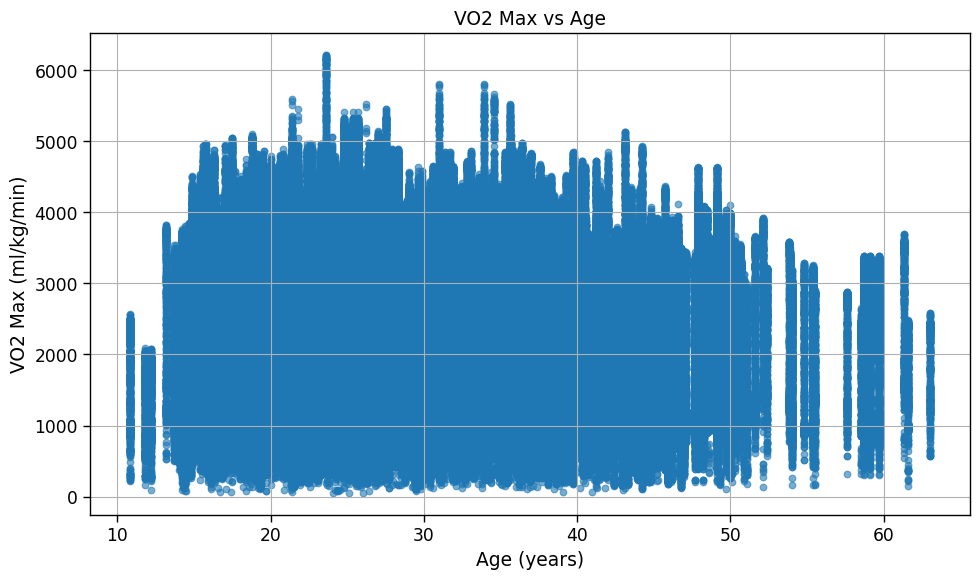

In [208]:

# Merge datasets using 'ID' column
merged_df = pd.merge(subject_info, test_measure, on='ID')

# Create scatter plot: VO2 vs Age
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Age'], merged_df['VO2'], alpha=0.6)
plt.title('VO2 Max vs Age')
plt.xlabel('Age (years)')
plt.ylabel('VO2 Max (ml/kg/min)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 63 Calculate the warm-up time, GET time, cool-down time, for each athlete test and find athlete who has maximum GET time ?


In [211]:

# Initialize list for results
results = []

# group  by  test ID
for test_id, group in test_measure.groupby('ID_test'):
    group = group.sort_values('time')

    # To Find warm-up end (first time VO2 > 500)
    warmup_end = group[group['VO2'] > 500]['time'].min()
    if pd.isna(warmup_end):
        warmup_end = group['time'].min()

    # To Find GET end (first time RR > 30 after warm-up)
    get_end = group[(group['time'] > warmup_end) & (group['RR'] > 30)]['time'].min()
    if pd.isna(get_end):
        get_end = group['time'].max()

    # calclulate Compute durations
    warmup_time = warmup_end - group['time'].min()
    get_time = get_end - warmup_end
    cooldown_time = group['time'].max() - get_end

    results.append({
        'ID_test': test_id,
        'Warmup_Time': warmup_time,
        'GET_Time': get_time,
        'Cooldown_Time': cooldown_time
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# To Find the athlete with max GET time
max_get = results_df[results_df['GET_Time'] == results_df['GET_Time'].max()]

print (max_get)

    ID_test  Warmup_Time  GET_Time  Cooldown_Time
838   747_1            0      1156            467


### 64 Compare the time it takes to multiply each element in a large array by 2  using an explicit loop and a vectorized operation with NumPy


In [234]:
import time

arr_size = 10000000
arr = np.arange(arr_size)

# using explicit loop method
start_time = time.time()
for i in range(arr_size):
    arr[i] = arr[i] * 2
end_time = time.time()
explicit_loop_time = end_time - start_time

# NumPy vectorized operation method
arr = np.arange(arr_size) # Reset array
start_time = time.time()
arr = arr * 2
end_time = time.time()
numpy_time = end_time - start_time

print(f"Time taken by explicit loop method: {explicit_loop_time:.4f} seconds")
print(f"Time taken by NumPy vectorized operation method: {numpy_time:.4f} seconds")
print(f"NumPy was {explicit_loop_time/numpy_time:.0f} times faster")


Time taken by explicit loop method: 3.5446 seconds
Time taken by NumPy vectorized operation method: 0.0157 seconds
NumPy was 226 times faster


In [243]:
### Make copies of the dataframes subject_i and test_m to work on the questions. 
### This will help avoid challenges while merging the notebooks.
#Make a dupicate dataframes to work on the questions and remove rows with Nan Values
subject_df = subject_i
test_df= test_m

In [245]:
subject_df['Sex'].replace(0,'Male',inplace=True)
subject_df['Sex'].replace(1,'Female',inplace=True)

In [247]:
subject_df.head(10)

Age  Weight  Height  Humidity  Temperature     Sex ID_test  birth_year
ID                                                                          
543  10.8    48.8   163.0      39.0         20.7  Female   543_1      2014.2
11   11.8    41.0   150.0      41.0         22.3  Female    11_1      2013.2
829  12.2    46.0   160.0      37.0         21.5    Male   829_1      2012.8
284  13.2    71.0   190.0      49.0         23.8  Female   284_1      2011.8
341  13.7    53.8   169.7      40.0         25.3    Male   341_1      2011.3
341  13.8    53.4   171.0      42.0         24.4    Male   341_2      2011.2
343  14.0    46.0   160.0      40.0         25.3    Male   343_1      2011.0
330  14.1    50.0   168.9      42.0         24.2    Male   330_1      2010.9
338  14.1    47.2   160.2      40.0         25.2    Male   338_1      2010.9
339  14.1    49.7   160.1      40.0         25.8    Male   339_1      2010.9

### 65. Calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes.

In [269]:
# taking max speed of the ID
Speed  = test_df.groupby('ID')['Speed'].max().reset_index()
Speed.columns = ['ID', 'MaxSpeed']
max_speed = pd.merge(Speed, subject_i['Sex'], on='ID')
max_speed.head()


ID  MaxSpeed   Sex
0   1      18.1  Male
1   2      16.3  Male
2   3      18.1  Male
3   4      16.2  Male
4   5      14.4  Male

In [271]:
# Extracting the speed values of the female athletes as a list
female_speed = max_speed[max_speed['Sex'] =='Female']['MaxSpeed'].tolist()
#print(len(female_max_speed))   138
#print(min(female_speed))  7
#print(max(female_speed)) 21.8

In [273]:
#Extracting the speed values of the male athletes as a list
male_speed = max_speed[max_speed['Sex'] =='Male']['MaxSpeed'].tolist()
#print(len(male_speed)) 719
#print(min(male_speed)) 8.5
#print(max(male_speed)) 23.1

In [275]:
#extracting the number of males whose speed is more than 12.94 which is the maximun speed of female athletes
males_greater_than_female_maxspeed = [num for num in male_speed if num > max(female_speed)]
print(len(males_greater_than_female_maxspeed)) # 98 males have  speed more than max. average speed of females


98


In [277]:
# Final Solution to #65
# To calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes. 
# method 1: if we want only the %of males out of total males
perc1 = (len(males_greater_than_female_maxspeed)/ len(male_speed))* 100

#method2: if we want the %of males out of total males + total females
perc2 = (len(males_greater_than_female_maxspeed)/ (len(male_speed) + len(female_speed)))* 100

print("The % of males out of only the total males who exceeded the maximum treadmill speed of female athletes is", round(perc1,2))
print("The % of males out of total population who exceeded the maximum treadmill speed of female athletes is",round(perc2,2))


The % of males out of only the total males who exceeded the maximum treadmill speed of female athletes is 11.63
The % of males out of total population who exceeded the maximum treadmill speed of female athletes is 9.88


### 66. Visualize the number of test taken by participants and their trend of maximum Vo2 level as dual chart ?


In [280]:
#number of test taken by participants
testcount = test_df.groupby('ID')['ID_test'].nunique().reset_index()
testcount.columns = ['ID', 'testCounts']

In [282]:
# maximum Vo2 level
vo2max = test_df.groupby('ID')['VO2'].max().reset_index()
vo2max.columns = ['ID', 'Vo2Max']

In [284]:
participants_max_vo2 = pd.merge(testcount, vo2max, on='ID')
participants_max_vo2.head()

ID  testCounts  Vo2Max
0   1           1  3267.0
1   2           1  2833.0
2   3           1  3692.0
3   4           1  4110.0
4   5           1  4053.0

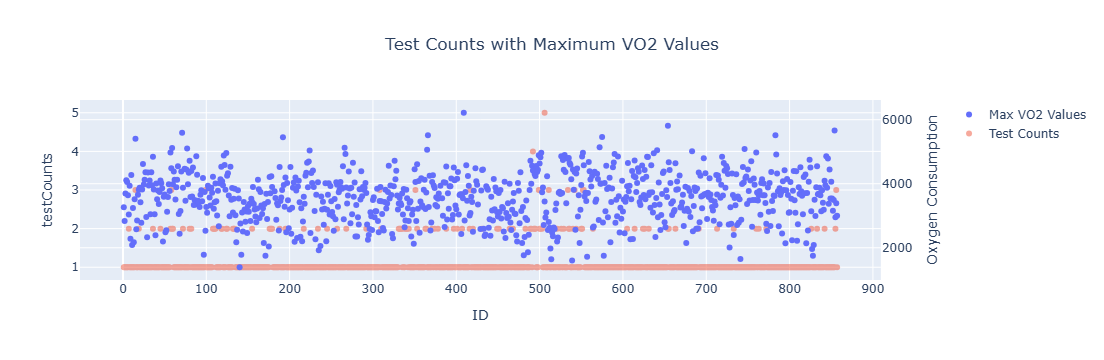

In [286]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs= [[{"secondary_y" :True}]])

fig.add_trace(
            go.Scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['Vo2Max'], name = "Max VO2 Values", mode='markers'),
            secondary_y =True
)

fig.add_trace(
            go.Scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['testCounts'], name = "Test Counts", mode='markers',opacity=0.5),
            secondary_y =False
)


fig.update_layout(title_text = "Test Counts with Maximum VO2 Values", title_x =0.5)
fig.update_xaxes(title_text = "ID")
fig.update_yaxes(title_text = "testCounts", secondary_y =False)
fig.update_yaxes(title_text = "Oxygen Consumption", secondary_y =True)


fig.show()

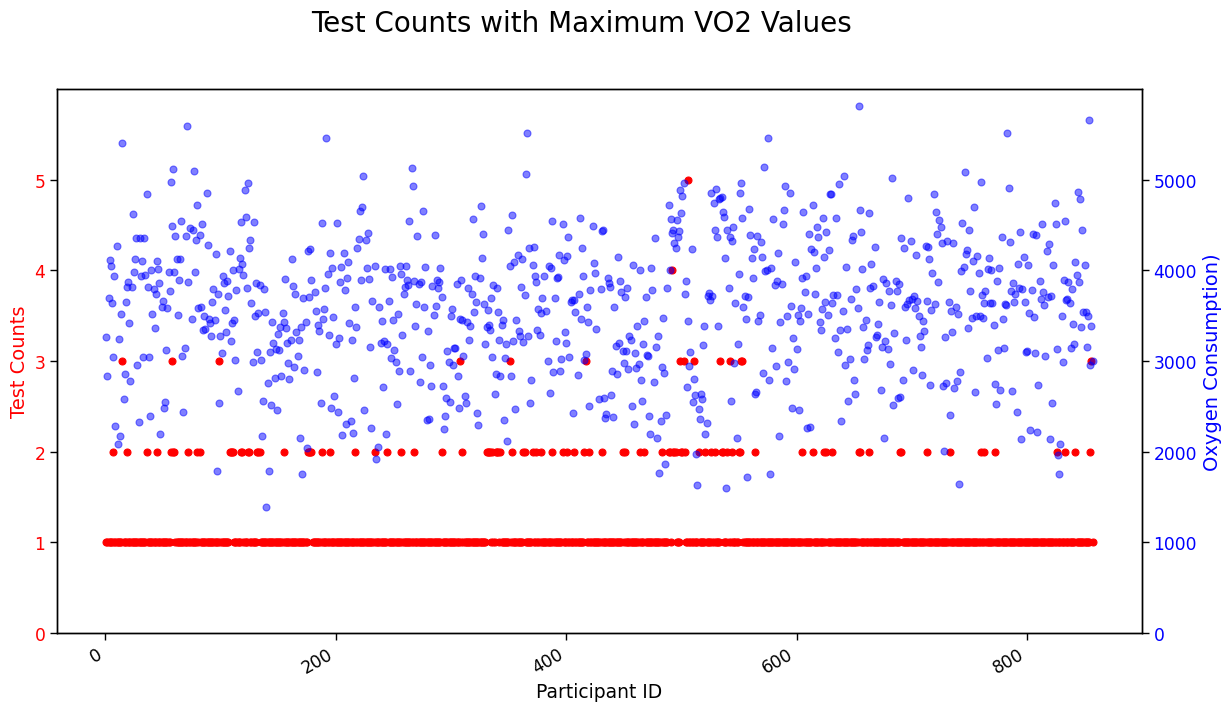

In [288]:
# Using Matplotlib

COLOR_1 = "red"
COLOR_2 = "blue"

fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

ax1.scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['testCounts'],  color=COLOR_1, s= 25)
ax2.scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['Vo2Max'], color=COLOR_2, alpha= 0.5, s=25)


ax1.set_xlabel("Participant ID")
ax1.set_ylabel("Test Counts", color=COLOR_1, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_1)
ax1.set_ylim([0, 6]) # Set y limit for second y axis
ax1.set_yticks(np.arange(0, 6, 1)) # Set increments for second y axis


ax2.set_ylabel("Oxygen Consumption)", color=COLOR_2, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_2)
ax2.set_ylim([0, 6000]) # Set y limit for second y axis
ax2.set_yticks(np.arange(0, 6000, 1000)) # Set increments for second y axis

fig.suptitle("Test Counts with Maximum VO2 Values", fontsize=20)
fig.autofmt_xdate()

plt.show()

### 67. Create violin chart for any two column from the dataset ?

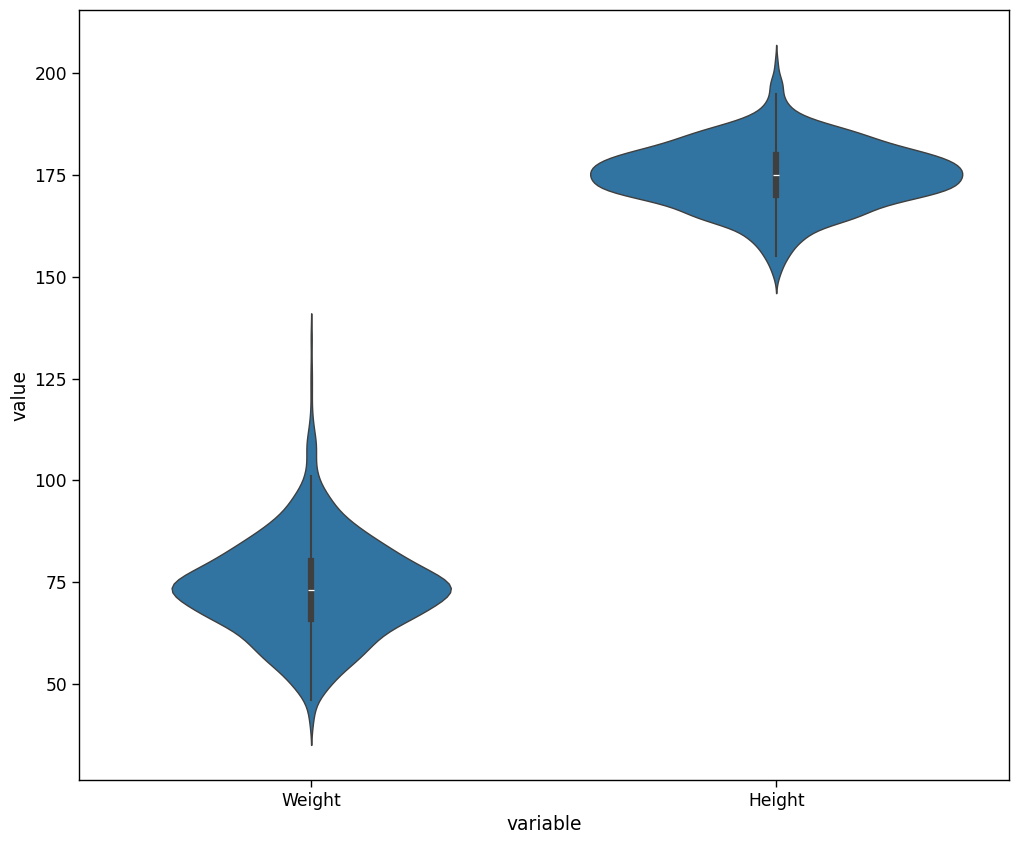

In [291]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)

df = subject_df[['Weight','Height']]

# Melt the dataframe to long format
df_melted = pd.melt(df, var_name='variable', value_name='value')

# Create the violin plot
fig =plt.figure(figsize =(12,10))

sns.violinplot(x='variable', y='value', data=df_melted)

# Show the plot
plt.show()

### 68. Calculate BSA (Body surface area) without using function and store as column in dataframe and categorize.


In [294]:

# Using the most commonly used formula "Du Bois Formula:BSA (m²) = 0.007184 x (Height (cm) ^ 0.725) x (Weight (kg) ^ 0.425)."
#subject_df['BSA'] = round((0.007184 * (subject_df['Height']**0.725) * (subject_df['Weight']**0.425)),2)

subject_df['BSA'] = round(np.sqrt(subject_df['Height']*subject_df['Weight']/3600), 2)

# Categorize BSA
def categorize_bsa(bsa):
    if bsa < 1.6:
        return 'Low'
    elif 1.6 <= bsa < 2.0:
        return 'Average'
    else:
        return 'High'

subject_df['bsa_category'] = subject_df['BSA'].apply(categorize_bsa)

subject_df.head(15)


Age  Weight  Height  Humidity  Temperature     Sex ID_test  birth_year  \
ID                                                                             
543  10.8    48.8   163.0      39.0         20.7  Female   543_1      2014.2   
11   11.8    41.0   150.0      41.0         22.3  Female    11_1      2013.2   
829  12.2    46.0   160.0      37.0         21.5    Male   829_1      2012.8   
284  13.2    71.0   190.0      49.0         23.8  Female   284_1      2011.8   
341  13.7    53.8   169.7      40.0         25.3    Male   341_1      2011.3   
341  13.8    53.4   171.0      42.0         24.4    Male   341_2      2011.2   
343  14.0    46.0   160.0      40.0         25.3    Male   343_1      2011.0   
330  14.1    50.0   168.9      42.0         24.2    Male   330_1      2010.9   
338  14.1    47.2   160.2      40.0         25.2    Male   338_1      2010.9   
339  14.1    49.7   160.1      40.0         25.8    Male   339_1      2010.9   
343  14.1    46.6   161.5      41.0         26.5    Male   343_5      2010.9   
333  14.2    65.2   170.1      42.0         24.4    Male   333_1      2010.8   
335  14.2    64.6   175.0      42.0         24.4    Male   335_1      2010.8   
339  14.2    51.0   163.0      42.0         24.4    Male   339_5      2010.8   
344  14.2    57.8   164.2      40.0         25.8    Male   344_1      2010.8   

      BSA bsa_category  
ID                      
543  1.49          Low  
11   1.31          Low  
829  1.43          Low  
284  1.94      Average  
341  1.59          Low  
341  1.59          Low  
343  1.43          Low  
330  1.53          Low  
338  1.45          Low  
339  1.49          Low  
343  1.45          Low  
333  1.76      Average  
335  1.77      Average  
339  1.52          Low  
344  1.62      Average

### 69. Write a python function that efficiently processes large data into chunks to analyze average heart rate and maximum oxygen consumption for each test. Print the chunks during processing.


In [297]:

# Due to large volume of the test dataset, I have only sampled 100 rows of data and chunk size of 50 for this question

def test_process(sampled_df, chunk_size = 50):
    
    for i in range(0, len(sampled_df), chunk_size):
        chunk = sampled_df[i:i + chunk_size]
        print("---------------------------------------------------------------")
        print(f"Processing chunk {i // chunk_size + 1} of {chunk_size} rows")
        print("---------------------------------------------------------------")
        print(chunk.head())
    
        test_ids = chunk['ID_test'].unique()
    
        # Add processing logic here to analyze average heart rate and maximum oxygen consumption for each test
        for test_id in test_ids:
            test_data = chunk[chunk['ID_test'] == test_id]
            # calculate average heart rate and maximum oxygen consumption 
            avg_heart_rate = test_data['HR'].mean(skipna=True)
            max_oxygen_consumption = test_data['VO2'].max()
            print("\n")
            print(f"Test ID: {test_id}")
            print(f"average heart rate: {avg_heart_rate:.2f}")
            print(f"maximum oxygen consumption: {max_oxygen_consumption:.2f}")
    print("-----------------------------------------------------------------")
    
       
sampled_df = test_df.sample(n= 100, random_state =123)
test_process(sampled_df, chunk_size=50)



---------------------------------------------------------------
Processing chunk 1 of 50 rows
---------------------------------------------------------------
        time  Speed     HR     VO2    VCO2    RR     VE ID_test   ID
242270   260    6.1  103.0  1073.0   838.0  18.0   21.4   363_1  363
68174    558   11.5  157.0  1936.0  1798.0  48.0   69.1   99_47   99
63090    876   16.8  202.0  3159.0  3668.0  52.0  114.5    90_1   90
346141  1021    5.0  122.0  1347.0  1901.0  31.0   63.7   508_1  508
208225   244    6.2  103.0  1048.0   962.0  18.0   21.8   321_1  321


Test ID: 363_1
average heart rate: 103.00
maximum oxygen consumption: 1073.00


Test ID: 99_47
average heart rate: 157.00
maximum oxygen consumption: 1936.00


Test ID: 90_1
average heart rate: 202.00
maximum oxygen consumption: 3159.00


Test ID: 508_1
average heart rate: 122.00
maximum oxygen consumption: 1347.00


Test ID: 321_1
average heart rate: 103.00
maximum oxygen consumption: 1048.00


Test ID: 518_1
average hear

In [ ]:
# This is for the whole test measure data
'''
def treadmill_data(filename, chunk_size= 2000):
    
    print(f"Processing Data in Chunks of {chunk_size} rows...")
    print("---------------------------------------------------")
    for chunk in pd.read_csv(filename, chunksize = chunk_size):
        print("Processing data chunks:")
        print(chunk.head())
        test_ids = chunk['ID_test'].unique()

        for test_id in test_ids:
            test_data = chunk[chunk['ID_test'] == test_id]
            # calculate average heart rate and maximum oxygen consumption 
            avg_heart_rate = test_data['HR'].mean(skipna=True)
            max_oxygen_consumption = test_data['VO2'].max()
            print("\n")
            print(f"Test ID: {test_id}")
            print(f"average heart rate: {avg_heart_rate:.2f}")
            print(f"maximum oxygen consumption: {max_oxygen_consumption:.2f}")
        
    print("-----------------------------------------------------------------")


treadmill_data('test_measure.csv', chunk_size=2000)

'''

### 70. How does the body's production of carbon dioxide related to the consumption of oxygen with increasing levels of pulmonary ventilation during GET? 


In [ ]:

# VE on x axis, vo2 and vco2 on y axis

#Consider Athelete with ID 100 
athlete_100 = test_df[test_df['ID_test']== '100_1'].reset_index()
df= athlete_100
df.head()

df.drop('index', axis=1, inplace=True)
df.head()

# Method 1: Using matplotlib subplotsdf= athlete_100
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True) # 2 rows, 1 column

axes[0].scatter(np.array(df['VE']), np.array(df['VCO2']), label='Carbon Dioxide', color='red')
axes[0].set_ylabel('Carbon Dioxide')
axes[0].legend()

axes[1].scatter(np.array(df['VE']), np.array(df['VO2']), label='Oxygen Saturation', color='blue')
axes[1].set_ylabel('Oxygen Saturation')
axes[1].set_xlabel('Pulmonary Ventilation')
axes[1].legend()

plt.tight_layout()
plt.show()


### Analysis: 

It is observed from the plots, as the pulmonary ventilation increases, oxygen consumption tends to increase and subsequently production of carbon dioxide increases. During a graded exercise test, as the pulmonary ventilation increases with exercise intensity, the body's carbon dioxide (CO2) production and oxygen consumption (O2) rates also rise proportionally. This is true during accleration but with decceleration of treadmill the rate of relationship between oxygen consumption and carbon dioxide production slightly differed or deviated.







### 71. Create a Funnel chart of Age Category (Child, Teen, Adult and Senior) ?


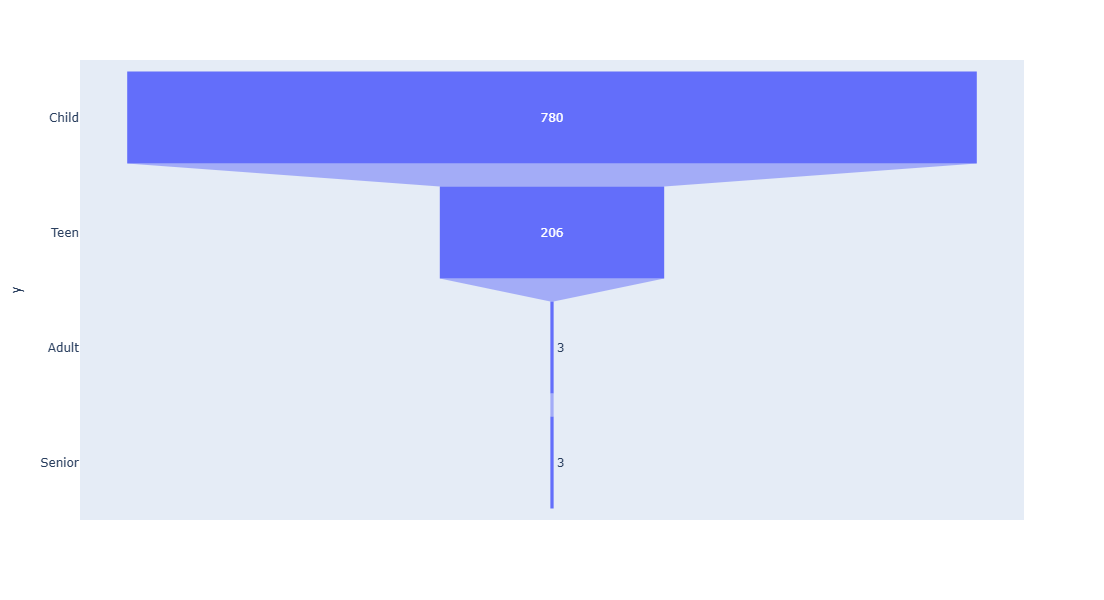

In [301]:
#Age Category
def age_category(df):
    if df['Age'] > 10 and df['Age'] < 13: 
        return 'Child'
    if df['Age'] >= 13 and df['Age'] < 20: 
        return 'Teen'
    if df['Age'] >= 20 and df['Age'] < 60: 
        return 'Adult'
    if df['Age'] >= 60 : 
        return 'Senior'

subject_df['Age Category'] = subject_df.apply(lambda x : age_category(x), axis = 1)
subject_df.head()



subject_df['Age Category'].unique()
age_df = subject_df['Age Category'].value_counts()
age_df.values

fig = px.funnel(subject_df, x = age_df.values, y =subject_df['Age Category'].unique(), width = 800, height = 600)
fig.show()

### 72. Visualize different physiological parameters over time for a specific test of an athlete using multiple panels?


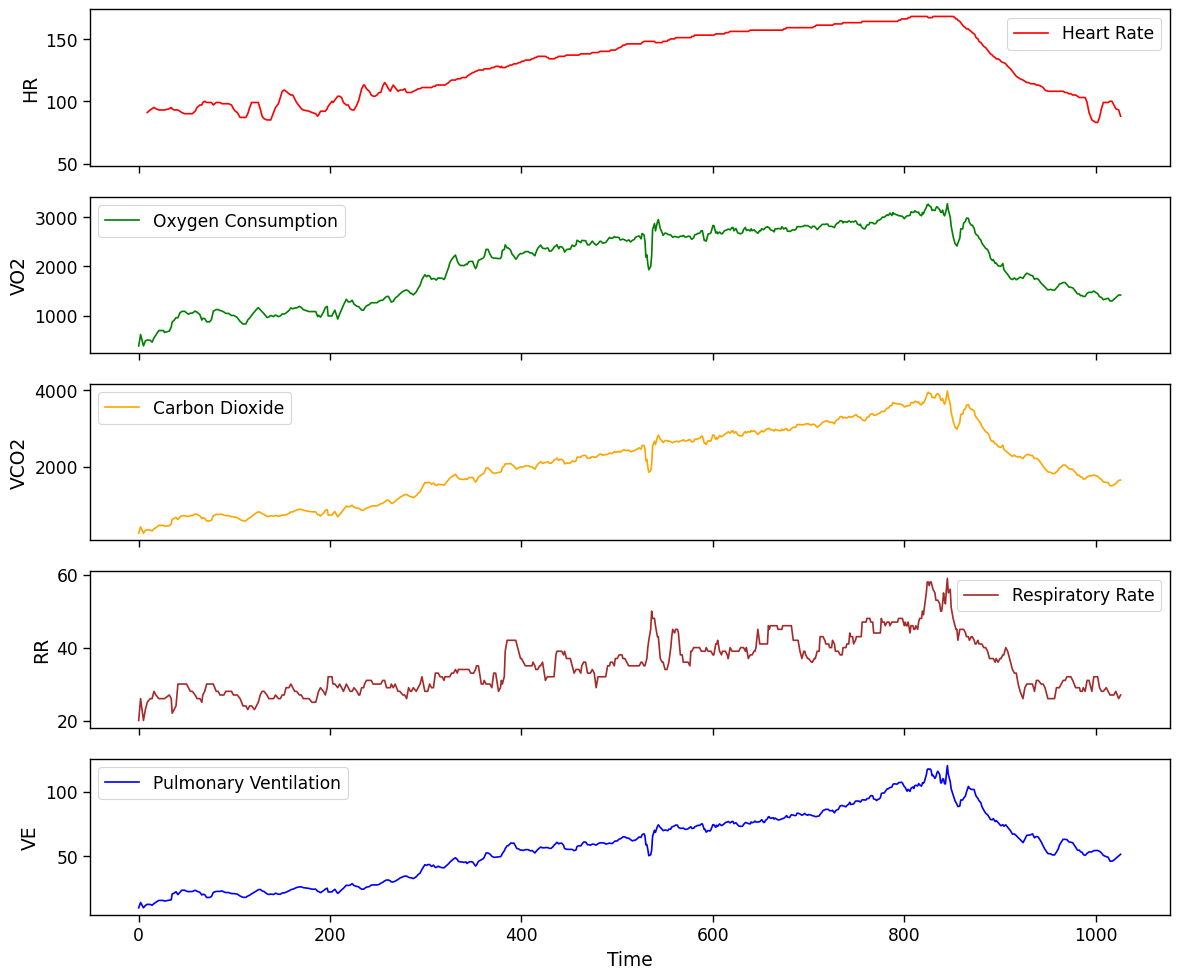

In [304]:
#Consider Athelete with ID 100 
df_100 = test_df[test_df['ID_test']== '100_1'].reset_index()
df_100.head()

# Drop the indexes
df_100.drop('index', axis=1, inplace=True)
df_100.head()

#  Using matplotlib subplots

fig, axes = plt.subplots(5, 1, figsize=(12, 10), sharex=True) # 5 rows, 1 column

axes[0].plot(np.array(df_100['time']), np.array(df_100['HR']), label='Heart Rate', color='red')
axes[0].set_ylabel('HR')
axes[0].legend()

axes[1].plot(np.array(df_100['time']), np.array(df_100['VO2']), label='Oxygen Consumption', color='green')
axes[1].set_ylabel('VO2')
axes[1].legend()

axes[2].plot(np.array(df_100['time']), np.array(df_100['VCO2']), label='Carbon Dioxide', color='orange')
axes[2].set_ylabel('VCO2')
axes[2].legend()

axes[3].plot(np.array(df_100['time']), np.array(df_100['RR']), label='Respiratory Rate', color='brown')
axes[3].set_ylabel('RR')
axes[3].legend()

axes[4].plot(np.array(df_100['time']), np.array(df_100['VE']), label='Pulmonary Ventilation', color='blue')
axes[4].set_ylabel('VE')
axes[4].set_xlabel('Time')
axes[4].legend()


plt.tight_layout()
plt.show()

### 73. Print first 10 records of the subject_info based on ID, without using head() method.

In [307]:
# using iloc we can access the first 10 rows/ records of a dataframe
subject_df.iloc[: 11]    

Age  Weight  Height  Humidity  Temperature     Sex ID_test  birth_year  \
ID                                                                             
543  10.8    48.8   163.0      39.0         20.7  Female   543_1      2014.2   
11   11.8    41.0   150.0      41.0         22.3  Female    11_1      2013.2   
829  12.2    46.0   160.0      37.0         21.5    Male   829_1      2012.8   
284  13.2    71.0   190.0      49.0         23.8  Female   284_1      2011.8   
341  13.7    53.8   169.7      40.0         25.3    Male   341_1      2011.3   
341  13.8    53.4   171.0      42.0         24.4    Male   341_2      2011.2   
343  14.0    46.0   160.0      40.0         25.3    Male   343_1      2011.0   
330  14.1    50.0   168.9      42.0         24.2    Male   330_1      2010.9   
338  14.1    47.2   160.2      40.0         25.2    Male   338_1      2010.9   
339  14.1    49.7   160.1      40.0         25.8    Male   339_1      2010.9   
343  14.1    46.6   161.5      41.0         26.5    Male   343_5      2010.9   

      BSA bsa_category Age Category  
ID                                   
543  1.49          Low        Child  
11   1.31          Low        Child  
829  1.43          Low        Child  
284  1.94      Average         Teen  
341  1.59          Low         Teen  
341  1.59          Low         Teen  
343  1.43          Low         Teen  
330  1.53          Low         Teen  
338  1.45          Low         Teen  
339  1.49          Low         Teen  
343  1.45          Low         Teen

### 74. Determine the treadmill speed range and age range in which you observe the highest average heart rate.


In [311]:
# Defining Age range
def age_range(df):
    if df['Age'] >= 10 and df['Age'] <= 20: 
        return '10-20'
    if df['Age'] > 20  and df['Age'] <= 30: 
        return '20-30'
    if df['Age'] > 30 and df['Age'] <= 40: 
        return '30-40'
    if df['Age'] > 40 and df['Age'] <= 50: 
        return '40-50'
    if df['Age'] > 50 and df['Age'] <= 60: 
        return '50-60'
    if df['Age'] > 60 : 
        return '60+'

subject_df['AgeRange'] = subject_df.apply(lambda x : age_range(x), axis = 1)
#subject_df


In [313]:
# Defining speed range
def speed_range(df):
    if df['Speed'] >=0 and df['Speed'] <=5: 
        return '0-5'
    if df['Speed'] > 5 and df['Speed'] <= 10: 
        return '5-10'
    if df['Speed'] > 10 and df['Speed'] <= 15: 
        return '10-15'
    if df['Speed'] >15 and  df['Speed'] <= 20: 
        return '15-20'
    if df['Speed'] > 20:
        return '20-30'

test_df['SpeedRange'] = test_df.apply(lambda x : speed_range(x), axis = 1)
#test_df

In [314]:
# Merge subject and test data
test_cleaned = test_df.dropna(subset=['HR'])
merge_df = test_cleaned.merge(subject_df, on=['ID','ID_test'])
merge_df.head()

time  Speed    HR    VO2   VCO2    RR    VE ID_test  ID SpeedRange  ...  \
0     0    5.0  63.0  478.0  360.0  27.0  13.3     2_1   2        0-5  ...   
1     2    5.0  75.0  401.0  295.0  23.0  10.3     2_1   2        0-5  ...   
2     4    5.0  82.0  449.0  319.0  29.0  12.2     2_1   2        0-5  ...   
3     7    5.0  87.0  461.0  340.0  28.0  12.8     2_1   2        0-5  ...   
4     9    5.0  92.0  574.0  417.0  28.0  14.6     2_1   2        0-5  ...   

   Weight  Height  Humidity  Temperature   Sex birth_year  BSA  bsa_category  \
0    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   
1    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   
2    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   
3    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   
4    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   

  Age Category AgeRange  
0        Adult    30-40  
1        Adult    30-40  
2        Adult    30-40  
3        Adult    30-40  
4        Adult    30-40  

[5 rows x 21 columns]

In [315]:
# Grouping by treadmill speed range and age range
grouped = merge_df.groupby(['SpeedRange', 'AgeRange'])['HR'].mean().reset_index()

# Find the group with highest avg HR
max_hr_group = grouped.iloc[grouped['HR'].idxmax()]
print("Highest Average Heart Rate Group:\n")
print(max_hr_group)

Highest Average Heart Rate Group:

SpeedRange         15-20
AgeRange           10-20
HR            186.536867
Name: 12, dtype: object


### 75. Identify subjects whose heart rate (HR) is consistently above their age group’s 75th percentile.

In [320]:
# Merge subject and test data after removing the null values from heart rate column
test_cleaned = test_df.dropna(subset=['HR'])
df1 = test_cleaned.merge(subject_df, on=['ID','ID_test'])

# Compute 75th percentile HR for each age group
hr_75th = df1.groupby('AgeRange')['HR'].quantile(0.75).to_dict()
print("The 75th percentiles of Heart rate for each Age Range is: \n",hr_75th)

# Add threshold column to each row for comparison
df1['HR_75th'] = df1['AgeRange'].map(hr_75th)

# select only required columns
selected_data = df1[['ID','AgeRange', 'HR', 'HR_75th']]
#selected_data.head()
new_data = selected_data.drop_duplicates()
#new_data.head()

The 75th percentiles of Heart rate for each Age Range is: 
 {'10-20': 181.0, '20-30': 175.0, '30-40': 170.0, '40-50': 163.0, '50-60': 157.0, '60+': 158.0}


In [322]:
# apply the transform function to check which HR values are above their 75th quartile
cons_subjects = new_data.groupby(['ID', 'AgeRange'])['HR'].transform(lambda x: x > x.quantile(0.75)).reset_index()
#cons_subjects

# Select only the data that returned TRUE 
sel_data = cons_subjects[cons_subjects['HR'] == True]
#print(len(sel_data))

# Extract the index values that are ID in the new_data
list_ID = sel_data['index'].tolist()
#print(list_ID)

filtered_df = new_data[new_data['ID'].isin(list_ID)]

# after selecting only the IDs that have HR True, we get 541 rows
f1 = filtered_df[filtered_df['HR'] > filtered_df['HR_75th'] ]
#f1

# Further filtering down the dataset to extract only the unique ID with HR greater than their 75th quantile
list1 = f1['ID'].unique()
# print(len(list1)) # 33 subjects

final_dataset = f1.drop_duplicates(subset=['ID'])
final_dataset.sort_values(by='AgeRange')

ID AgeRange     HR  HR_75th
291974  441    10-20  182.0    181.0
230167  347    10-20  182.0    181.0
291529  440    10-20  182.0    181.0
291172  439    10-20  182.0    181.0
253084  379    10-20  182.0    181.0
348927  514    20-30  176.0    175.0
189965  290    20-30  176.0    175.0
190395  291    20-30  176.0    175.0
333086  499    20-30  176.0    175.0
195268  301    20-30  176.0    175.0
292751  442    20-30  176.0    175.0
243403  365    20-30  176.0    175.0
251770  378    20-30  176.0    175.0
182031  275    30-40  171.0    170.0
240094  360    30-40  171.0    170.0
207478  320    30-40  171.0    170.0
200361  310    30-40  171.0    170.0
265480  398    40-50  164.0    163.0
266638  400    40-50  164.0    163.0
241538  363    40-50  164.0    163.0
194845  300    40-50  164.0    163.0
342029  506    40-50  164.0    163.0
251210  377    50-60  158.0    157.0

### 76. List the participants ID and test _ID who started their warm up with speed less than 5km/h ?


In [325]:
# Filter rows where speed less than 5 km/h
speed5_df = test_df[test_df['Speed'] < 5]

filtered_df = speed5_df.drop(columns = ['time','HR','VO2','VCO2', 'RR', 'VE','SpeedRange'])

warmup_df = filtered_df.drop_duplicates(subset=['ID', 'ID_test'])

# List of unique ID participants with warm up speed less than 5km/h
warmup_df
#.head(10) 


Speed ID_test   ID
1207      0.0     4_1    4
7433      0.0     1_1    1
25655     0.0    38_1   38
25990     0.0    39_1   39
26030     0.0    40_1   40
...       ...     ...  ...
571591    0.0   855_6  855
572209    0.0   855_1  855
572828    4.9   856_3  856
573447    4.9   856_2  856
574067    4.9   856_1  856

[365 rows x 3 columns]

### 77. Calculate the mean VO2 max for male and female athletes in the Get Phase.



In [349]:
# Merge datasets
df2 = test_df.merge(subject_df, on=['ID', 'ID_test'])
df2.head()

time  Speed    HR    VO2   VCO2    RR    VE ID_test  ID SpeedRange  ...  \
0     0    5.0  63.0  478.0  360.0  27.0  13.3     2_1   2        0-5  ...   
1     2    5.0  75.0  401.0  295.0  23.0  10.3     2_1   2        0-5  ...   
2     4    5.0  82.0  449.0  319.0  29.0  12.2     2_1   2        0-5  ...   
3     7    5.0  87.0  461.0  340.0  28.0  12.8     2_1   2        0-5  ...   
4     9    5.0  92.0  574.0  417.0  28.0  14.6     2_1   2        0-5  ...   

   Weight  Height  Humidity  Temperature   Sex birth_year  BSA  bsa_category  \
0    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   
1    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   
2    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   
3    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   
4    68.0   171.1       NaN          NaN  Male     1991.2  1.8       Average   

  Age Category AgeRange  
0        Adult    30-40  
1        Adult    30-40  
2        Adult    30-40  
3        Adult    30-40  
4        Adult    30-40  

[5 rows x 21 columns]

In [351]:
VO2_max = df2.groupby(['ID_test','Sex'])['VO2'].max().reset_index()
VO2_max.columns = ['ID_test','Sex', 'Max_VO2']
VO2_max

ID_test     Sex  Max_VO2
0     100_1    Male   3272.0
1     101_1    Male   3093.0
2     102_1    Male   3935.0
3     103_1    Male   3861.0
4     104_1    Male   3568.0
..      ...     ...      ...
987    98_1    Male   3741.0
988    99_1  Female   2278.0
989   99_47  Female   2029.0
990   99_54  Female   2532.0
991     9_1  Female   2282.0

[992 rows x 3 columns]

In [353]:
# FINAL: The mean VO2 max for male and female athletes in the Get Phase.
mean_VO2_max_by_gender  = VO2_max.groupby('Sex')['Max_VO2'].mean()
mean_VO2_max_by_gender 

Sex
Female    2547.737931
Male      3736.218900
Name: Max_VO2, dtype: float64

### 78. If you consider cool down time as the recovery period after reaching peak speed, display the participant details who has taken the longest Cool Down time.



In [329]:
#minimum time at minimum speed---> warmup
#max time , max speed
#maximum time at minimim speed ---> cool dowm
#longest Cool Down time  = maxtime of max speed - end time of the test       

# Merge datasets
#df2 = test_df.merge(subject_df, on=['ID', 'ID_test'])
#df2.head()

# For each participant, find the time when peak speed occurs
longest_cooldown = []

for pid in df2['ID_test'].unique():
    sub_df = df2[df2['ID_test'] == pid].sort_values('time')
    
    max_speed = sub_df['Speed'].max()
    peak_time = sub_df[sub_df['Speed'] == max_speed]['time'].max()
    
    cooldown_time = sub_df['time'].max() - peak_time
    
    longest_cooldown.append({
        'ID_test': pid,
        'CoolDownTime': cooldown_time
    })

# Create DataFrame and find the longest
cooldown_df = pd.DataFrame(longest_cooldown)
top = cooldown_df.sort_values('CoolDownTime', ascending=False).head(1)

# Merge with subject info
result = top.merge(subject_df, on='ID_test')
result[['ID_test', 'CoolDownTime', 'Age', 'Sex', 'Weight', 'Height']]


ID_test  CoolDownTime   Age   Sex  Weight  Height
0   218_1           762  45.6  Male    76.0   176.0

### 79. Identify the athlete who recorded the highest treadmill speed during the tests.

In [333]:
maxspeed_row_id = test_df['Speed'].idxmax()
maxspeed_row = test_df.iloc[maxspeed_row_id]
#print(maxspeed_row)
print("The ID of the athlete who recorded the highest treadmill speed during the test is", maxspeed_row['ID'])

test_df.iloc[maxspeed_row_id]

The ID of the athlete who recorded the highest treadmill speed during the test is 431


time               1233
Speed              23.1
HR                147.0
VO2              3437.0
VCO2             4483.0
RR            59.057692
VE                135.5
ID_test           431_1
ID                  431
SpeedRange        20-30
Name: 287937, dtype: object

### 80. Show the oxygen consumption trend analysis among women athletes across different age groups 

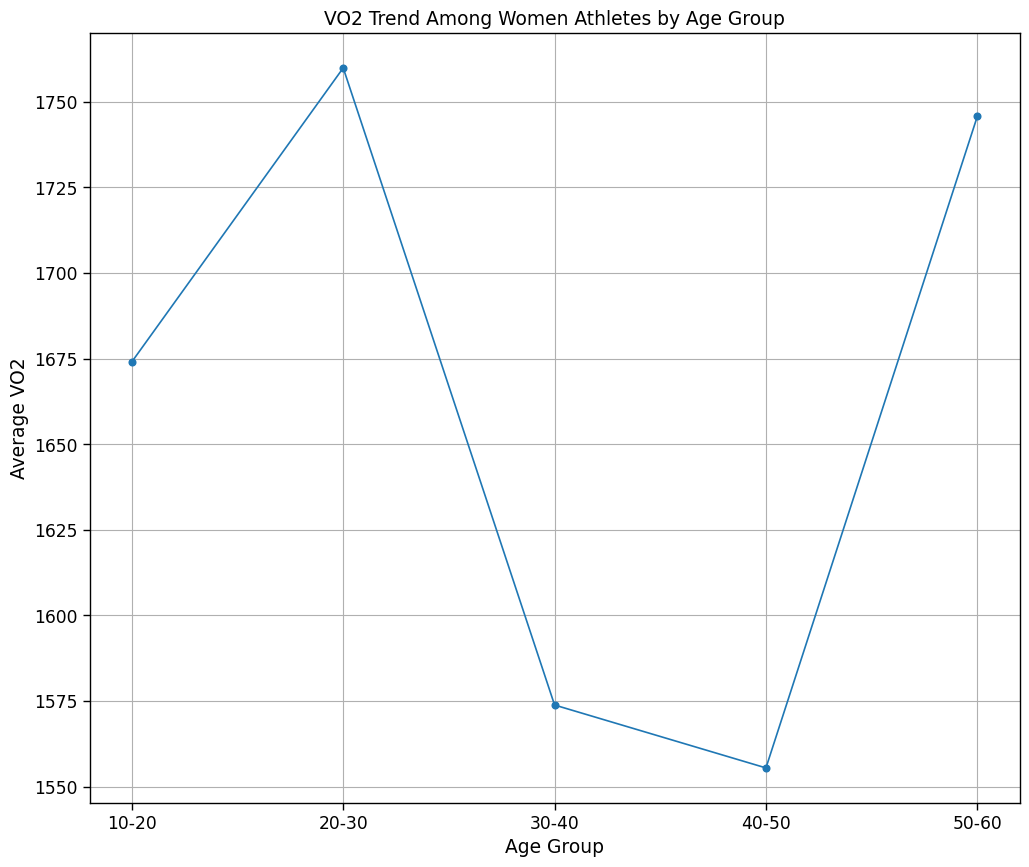

In [336]:
# take the merged dataset df2 and group by taking sex and agerange to compute the averahe oxygein consumption
df3 = df2.groupby(['Sex','AgeRange'])['VO2'].mean().reset_index()

# Filter the dataset df3 based on female athletes
women_df = df3[df3['Sex'] == 'Female']

# replace the VO2 name to avgO2
women_df.rename(columns={'VO2': 'avgO2'}, inplace=True)

women_df

# Plot the trend of VO2 among women athletes across different age groups using line plot

fig =plt.figure(figsize =(12,10))
plt.plot( np.array(women_df['AgeRange']) ,np.array(women_df['avgO2']), marker ='o', linestyle='-')
plt.title('VO2 Trend Among Women Athletes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average VO2')
plt.grid(True)
plt.show()


###  Extra Question: Plot Violin Plot for Age category with respect to weight


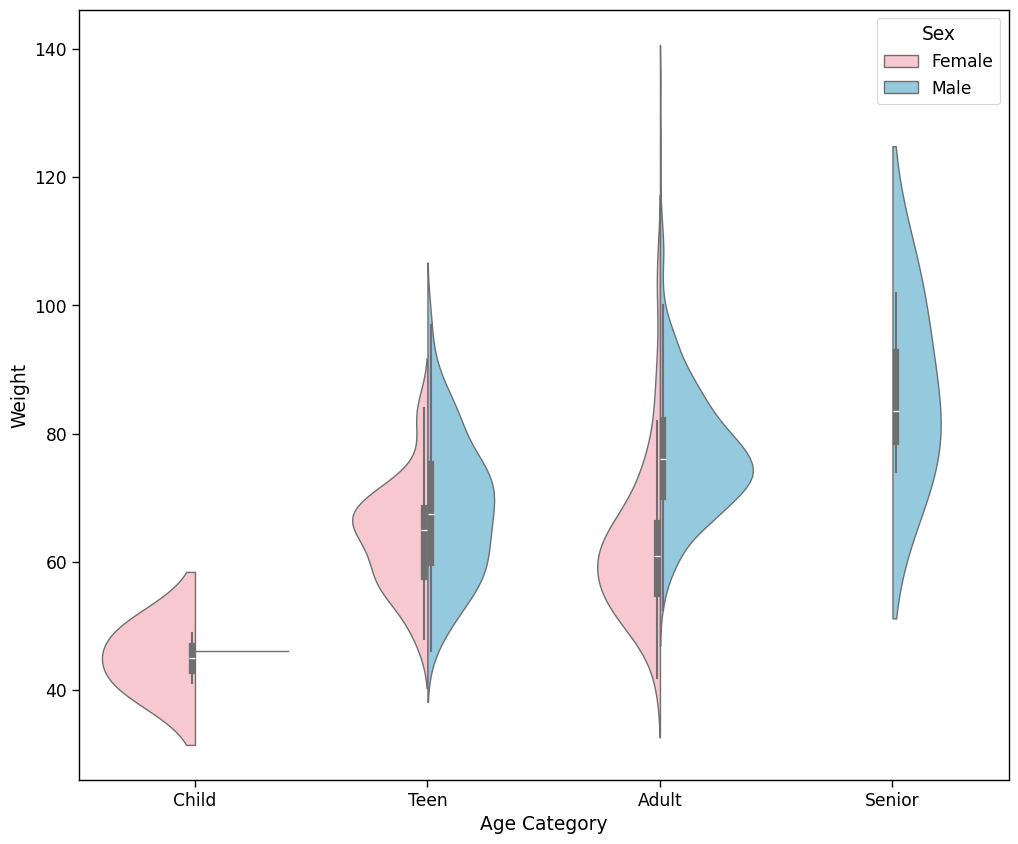

In [339]:
# Plot Violin Chart for Age category with respect to weight
fig =plt.figure(figsize =(12,10))
palette_dict = {'Male': 'Skyblue', 'Female': 'Pink'}
sns.violinplot(x='Age Category' ,y='Weight',data=subject_df, hue='Sex', palette=palette_dict ,split=True)
plt.show()
